# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# <Student to fill this section>
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy import stats as st
import os
import joblib
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.metrics import f1_score


In [4]:
# installing the custom package

! pip install --extra-index https://test.pypi.org/simple/ doombuoy

Looking in indexes: https://pypi.org/simple, https://test.pypi.org/simple/


---
## B. Business Understanding

In [8]:
# <Student to fill this section>
business_use_case_description = """
Explain clearly what is the goal of this project for the business.
The aim of this project is to create reliable next week rain/no-rain prediction models that can be integrated into Open Meteo's API offerings,
thereby improving the accuracy and utility of their weather forecasts for end-users.
"""


In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
# <Student to fill this section>
business_objectives = """
What will be the impact of accurate or incorrect results?
Accurate next week rain/no-rain predictions will enhance user trust in Open Meteo's services, leading to increased usage and customer satisfaction.
ACCURATE PREDICTIONS:
• Increased customer trust and API usage
• Premium pricing for AI-enhanced services
• Competitive advantage in weather forecasting market

INCORRECT PREDICTIONS:
• Damage to Open Meteo's reputation and credibility
• Customer losses due to unreliable forecasts
• Potential liability for weather-related decision failures

CLIENT IMPACT:
• Farmers: Crop losses from poor irrigation timing and harvest decisions
• Event planners: Financial losses from cancelled outdoor events and venue costs
• Logistics companies: Delivery delays and increased transportation safety risks

Accurate rain predictions are essential for Open Meteo's business success and customer safety.
Hypothesis: "Using advanced machine learning models with engineered features and optimized hyperparameters will give the recall of at least 0.6 of rain/no-rain predictions, aligning with the business objective of minimizing false negatives to enhance customer trust and satisfaction."
"""


In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?

RESULTS USAGE:
• Real-time API calls for immediate weather decisions
• Daily/weekly forecasts for operational planning
• Integration into business systems and mobile apps

PRIMARY USERS:
• Farmers: Irrigation scheduling and crop management decisions
• Event planners: Outdoor event planning and venue selection
• Logistics companies: Route planning and delivery scheduling
• Construction firms: Project timing and safety protocols

WHO WILL BE IMPACTED:
• Farmers: Crop yield and financial losses from incorrect irrigation timing
• Event planners: Revenue losses from cancelled events due to weather misjudgments
• Logistics companies: Operational delays and increased transportation costs
• Construction firms: Worker safety risks and project schedule disruptions
• General public: Personal safety and daily activity planning decisions
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.0   Download Dataset


In [14]:
# # Run this cell to make data directory and download dataset if not already done.
# ! cd ../../
# ! python -m ml_as_api.dataset

### C.1   Load Datasets


In [15]:
# <Student to fill this section>
df=pd.read_csv(r'../../data\raw\weather_data.csv')
df.head()


,date,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,wind_speed_10m_max,wind_gusts_10m_max,...,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max,soil_moisture_0_to_100cm_mean,soil_moisture_0_to_7cm_mean,soil_moisture_28_to_100cm_mean,soil_moisture_7_to_28cm_mean,soil_temperature_0_to_100cm_mean,soil_temperature_0_to_7cm_mean,soil_temperature_7_to_28cm_mean,soil_temperature_28_to_100cm_mean
0,2009-12-31 14:00:00+00:00,53.0,22.964250,25.670502,21.070500,25.151611,26.715890,24.240880,18.581022,35.640000,...,19.931772,1.047818,0.120040,0.181667,0.093000,0.192208,22.152273,23.003832,22.655916,21.922585
1,2010-01-01 14:00:00+00:00,63.0,23.612165,26.920502,20.970500,26.942467,32.614998,22.179842,15.584300,37.440000,...,19.692732,1.030170,0.122225,0.220250,0.093000,0.189750,22.497442,24.720497,23.605917,21.958000
2,2010-01-02 14:00:00+00:00,51.0,19.882996,20.620499,19.470500,19.709002,21.280840,19.180962,18.345877,37.440000,...,15.879213,0.835103,0.123362,0.223417,0.093833,0.191250,22.132751,21.326750,22.643415,22.062164
3,2010-01-03 14:00:00+00:00,51.0,20.887167,22.520500,19.220500,21.016272,22.343325,19.466248,16.870138,37.440000,...,15.985977,0.959982,0.121697,0.202292,0.094000,0.189792,21.884003,21.845499,21.678835,21.947586
4,2010-01-04 14:00:00+00:00,3.0,22.520498,26.020500,18.620499,24.393919,30.018890,19.811030,17.477621,39.239998,...,16.724476,1.298432,0.118544,0.175625,0.094000,0.183667,22.143875,23.745499,22.583000,21.860079


### C.1.1  Explore Datasets


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date                               5479 non-null   object 
 1   weather_code                       5479 non-null   float64
 2   temperature_2m_mean                5479 non-null   float64
 3   temperature_2m_max                 5479 non-null   float64
 4   temperature_2m_min                 5479 non-null   float64
 5   apparent_temperature_mean          5479 non-null   float64
 6   apparent_temperature_max           5479 non-null   float64
 7   apparent_temperature_min           5479 non-null   float64
 8   wind_speed_10m_max                 5479 non-null   float64
 9   wind_gusts_10m_max                 5479 non-null   float64
 10  wind_direction_10m_dominant        5479 non-null   float64
 11  shortwave_radiation_sum            5479 non-null   float

The dataset consists of 5,479 entries with 55 features in total. It includes 52 columns of type float64, 2 columns of type int64, and 1 column of type object.

#### Lets check for outliers

In [17]:

# Identify outliers in numeric columns using IQR and Z-score methods
def detect_outliers_iqr(df, cols=None, k=1.5):
    """
    Returns a boolean DataFrame (same index/cols) where True indicates an outlier per IQR rule:
    value < Q1 - k*IQR or value > Q3 + k*IQR
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    out = pd.DataFrame(False, index=df.index, columns=cols)
    for c in cols:
        series = df[c].dropna()
        if series.empty:
            continue
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        out.loc[:, c] = (df[c] < lower) | (df[c] > upper)
    return out

def detect_outliers_zscore(df, cols=None, thresh=3.0):
    """
    Returns a boolean DataFrame where True indicates |(x - mean)/std| > thresh.
    Uses population std (ddof=0) to be conservative; ignores NaNs.
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    out = pd.DataFrame(False, index=df.index, columns=cols)
    for c in cols:
        series = df[c]
        if series.dropna().shape[0] < 2:
            continue
        mu = series.mean()
        sigma = series.std(ddof=0)
        if sigma == 0 or np.isnan(sigma):
            continue
        z = (series - mu) / sigma
        out[c] = z.abs() > thresh
    return out

# Example usage: compute and summarize outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('rain_binary', errors='ignore').tolist()

iqr_out = detect_outliers_iqr(df, cols=numeric_cols, k=1.5)
z_out = detect_outliers_zscore(df, cols=numeric_cols, thresh=3.0)

# combine (True if flagged by either method)
outlier_flags = iqr_out | z_out

# summary counts per column and percent
outlier_counts = outlier_flags.sum().sort_values(ascending=False)
outlier_pct = (outlier_counts / len(df) * 100).round(3)
out_summary = pd.DataFrame({'count': outlier_counts, 'pct': outlier_pct})
display(out_summary[out_summary['count'] > 0])

# rows that have any outlier
rows_with_outliers = outlier_flags.any(axis=1)
print(f"Rows with any outlier: {rows_with_outliers.sum()} / {len(df)} ({rows_with_outliers.mean()*100:.2f}%)")

# show a few example rows with outliers and which cols are flagged
if rows_with_outliers.any():
    sample_idx = df.index[rows_with_outliers][:10]
    display(pd.concat([df.loc[sample_idx, numeric_cols], outlier_flags.loc[sample_idx, numeric_cols].astype(int)],
                      keys=['values','outlier_flag'], axis=1))


,count,pct
cloud_cover_max,864,15.769
precipitation_sum,808,14.747
rain_sum,808,14.747
cloud_cover_min,626,11.425
sunshine_duration,486,8.870
precipitation_hours,384,7.009
wind_gusts_10m_min,328,5.986
vapour_pressure_deficit_max,312,5.694
wind_speed_10m_min,239,4.362
relative_humidity_2m_max,203,3.705


Rows with any outlier: 2537 / 5479 (46.30%)


values                                                            \
   weather_code temperature_2m_mean temperature_2m_max temperature_2m_min   
0          53.0           22.964250          25.670502          21.070500   
1          63.0           23.612165          26.920502          20.970500   
2          51.0           19.882996          20.620499          19.470500   
6           3.0           21.364248          23.070500          19.620499   
9           1.0           24.451752          27.320500          21.270500   
11         51.0           25.524672          30.370499          21.170502   
13          3.0           21.370500          22.720500          19.920502   
14         51.0           22.070498          23.420502          21.120499   
16         63.0           22.037169          25.320500          19.070500   
18          0.0           20.176750          23.970500          15.970500   

                                                       \
   apparent_temperature_mean apparent_temperature_max   
0                  25.151611                26.715890   
1                  26.942467                32.614998   
2                  19.709002                21.280840   
6                  21.611094                23.130701   
9                  26.600761                30.870040   
11                 28.837305                35.924774   
13                 21.535097                23.054485   
14                 23.728148                24.893555   
16                 23.796270                29.362179   
18                 19.526289                25.340685   

                                                                   \
   apparent_temperature_min wind_speed_10m_max wind_gusts_10m_max   
0                 24.240880          18.581022          35.640000   
1                 22.179842          15.584300          37.440000   
2                 19.180962          18.345877          37.440000   
6                 20.034603          14.904173          32.760002   
9                 23.076862          18.720001          41.399998   
11                23.731840          18.864824          38.519997   
13                19.490849          19.211996          38.519997   
14                22.689213          14.408997          32.039997   
16                19.383911          18.359999          49.320000   
18                14.406509          11.019764          24.840000   

                                ...                outlier_flag  \
   wind_direction_10m_dominant  ... wet_bulb_temperature_2m_min   
0                    331.64750  ...                           0   
1                    298.61030  ...                           0   
2                    146.74464  ...                           0   
6                    147.25504  ...                           0   
9                    159.51851  ...                           0   
11                    37.02098  ...                           0   
13                   165.63329  ...                           0   
14                   138.62370  ...                           0   
16                   166.73466  ...                           0   
18                   262.25370  ...                           0   

                                                              \
   vapour_pressure_deficit_max soil_moisture_0_to_100cm_mean   
0                            0                             0   
1                            0                             0   
2                            0                             0   
6                            0                             0   
9                            0                             0   
11                           0                             0   
13                           0                             0   
14                           0                             0   
16                           0                             0   
18                           0                             0 

Approximately 46% of the rows contain outliers in one or more columns. These outliers will be addressed during the data cleaning process.

### C.2 Define Target variable

First, we will convert the target column into a binary format, and then transform it to indicate whether it rained in the following week.

In [18]:


class RainBinaryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, shift_days=-7):
        self.shift_days = shift_days

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if 'rain_sum' not in X.columns:
            raise KeyError("Column 'rain_sum' not found in input data.")

        # Create the rain_binary column
        X['rain_binary'] = (X['rain_sum'] > 0).astype(int)

        # Shift the rain_binary column
        X['rain_binary'] = X['rain_binary'].shift(self.shift_days)

        # fill 0 rows with NaN values in the rain_binary column
        # X.dropna(subset=['rain_binary'], inplace=True)
        X.fillna(0,inplace=True)

        # Ensure the rain_binary column is integer type
        X['rain_binary'] = X['rain_binary'].astype(int)

        return X

# Example usage in a pipeline


rain_pipeline = Pipeline(
    steps=[
        ('rain_binary_transformer', RainBinaryTransformer(shift_days=-7))
    ]
)

# Transform the dataframe
try:
    df = rain_pipeline.fit_transform(df)
    print("Transformation successful. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during transformation: {e}")

Transformation successful. Transformed DataFrame:
                        date  weather_code  temperature_2m_mean  \
0  2009-12-31 14:00:00+00:00          53.0            22.964250   
1  2010-01-01 14:00:00+00:00          63.0            23.612165   
2  2010-01-02 14:00:00+00:00          51.0            19.882996   
3  2010-01-03 14:00:00+00:00          51.0            20.887167   
4  2010-01-04 14:00:00+00:00           3.0            22.520498   

   temperature_2m_max  temperature_2m_min  apparent_temperature_mean  \
0           25.670502           21.070500                  25.151611   
1           26.920502           20.970500                  26.942467   
2           20.620499           19.470500                  19.709002   
3           22.520500           19.220500                  21.016272   
4           26.020500           18.620499                  24.393919   

   apparent_temperature_max  apparent_temperature_min  wind_speed_10m_max  \
0                 26.715890          

In [19]:
# to be used ahead
temp=df.copy()

In [20]:
df.shape

(5479, 56)

In [21]:
# <Student to fill this section>
target_definition_explanations = """
Explain the rationale on the definition of the target variable according to your business use case.

RATIONALE:
• 'rain_sum' directly measures actual rainfall, making it the most relevant for rain prediction
• So we make a new binary target variable 'rain_binary' based on 'rain_sum'
• Binary classification: rain_sum > 0 = Rain (1), rain_sum = 0 = No Rain (0) in next week
• This aligns with business needs for clear yes/no rain predictions


"""

In [22]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [23]:
# <Student to fill this section>
# Create binary target variable for rain/no-rain classification

target_name = 'rain_binary'
target_variable=df[target_name]

### C.4 Explore Target variable

In [24]:
# <Student to fill this section>
target_variable.head()

0    1
1    0
2    0
3    0
4    1
Name: rain_binary, dtype: int64

In [25]:
target_variable.describe()

count    5479.000000
mean        0.523453
std         0.499495
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: rain_binary, dtype: float64

In [26]:
target_variable.isnull().sum()

np.int64(0)

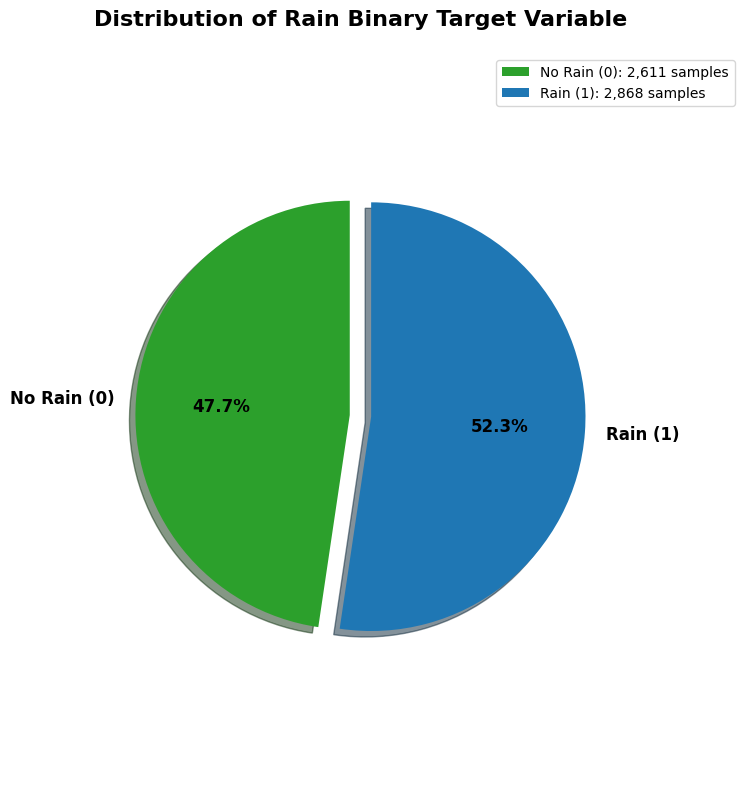

=== TARGET VARIABLE DISTRIBUTION ===
Total observations: 5,479
No Rain (0): 2,611 (47.7%)
Rain (1): 2,868 (52.3%)
Class balance ratio: 0.91:1


In [27]:

# Get the value counts for the target variable
target_counts = df['rain_binary'].value_counts().sort_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
colors = ['#2ca02c', '#1f77b4']  # Green for No Rain (0), Blue for Rain (1)
labels = ['No Rain (0)', 'Rain (1)']
explode = (0.05, 0.05)  # Slightly separate both slices

plt.pie(target_counts.values, 
         labels=labels, 
         colors=colors,
         autopct='%1.1f%%',
         startangle=90,
         explode=explode,
         shadow=True,
         textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Distribution of Rain Binary Target Variable', 
          fontsize=16, fontweight='bold', pad=20)

# Add a legend with counts
legend_labels = [f'{labels[i]}: {target_counts.values[i]:,} samples' 
                 for i in range(len(labels))]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Print summary statistics
print("=== TARGET VARIABLE DISTRIBUTION ===")
print(f"Total observations: {len(df):,}")
print(f"No Rain (0): {target_counts[0]:,} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"Rain (1): {target_counts[1]:,} ({target_counts[1]/len(df)*100:.1f}%)")
print(f"Class balance ratio: {target_counts[0]/target_counts[1]:.2f}:1")

 the data seems to be balanced 

Lets visualize rain_sum column as well for better understanding

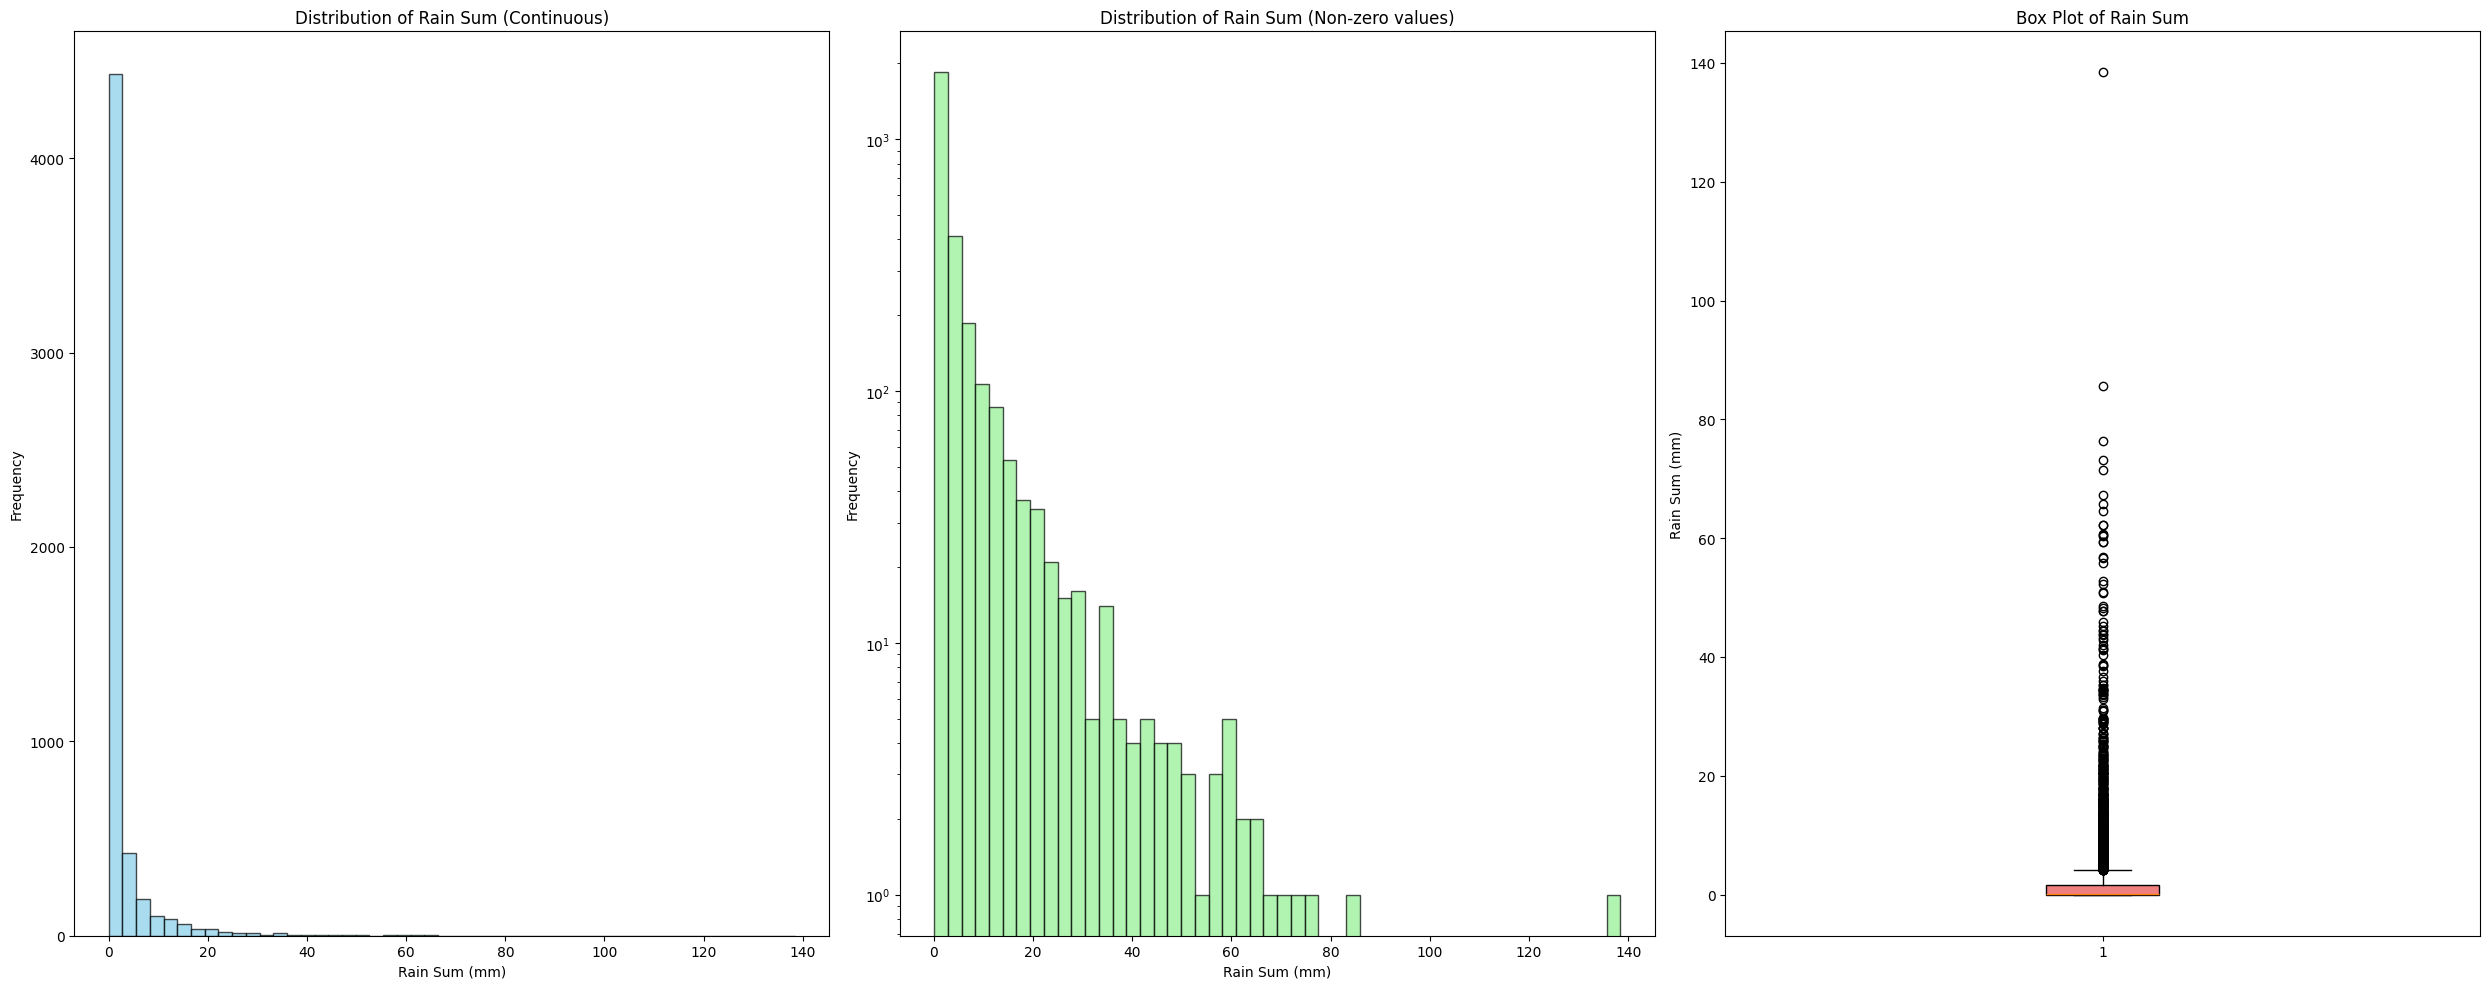

In [28]:
# Visualize the target variable distribution
plt.figure(figsize=(25, 10))

# 1. Distribution of rain_sum (continuous)
plt.subplot(1, 3, 1)
plt.hist(df['rain_sum'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Rain Sum (Continuous)')
plt.xlabel('Rain Sum (mm)')
plt.ylabel('Frequency')

# 2. Distribution of rain_sum (log scale for better visualization)
plt.subplot(1, 3, 2)
rain_nonzero = df[df['rain_sum'] > 0]['rain_sum']
plt.hist(rain_nonzero, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Rain Sum (Non-zero values)')
plt.xlabel('Rain Sum (mm)')
plt.ylabel('Frequency')
plt.yscale('log')

# 3. Box plot of rain_sum
plt.subplot(1, 3, 3)
plt.boxplot(df['rain_sum'], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot of Rain Sum')
plt.ylabel('Rain Sum (mm)')

plt.tight_layout()
plt.show()

- Binary Target Conversion: The rain_binary column effectively captures rain/no-rain events based on rain_sum > 0.
- Rain Distribution: Rainfall data is highly skewed, with most values near zero and a long tail of heavy rainfall.
- Outliers: Significant outliers in rain_sum may impact model performance and require preprocessing.

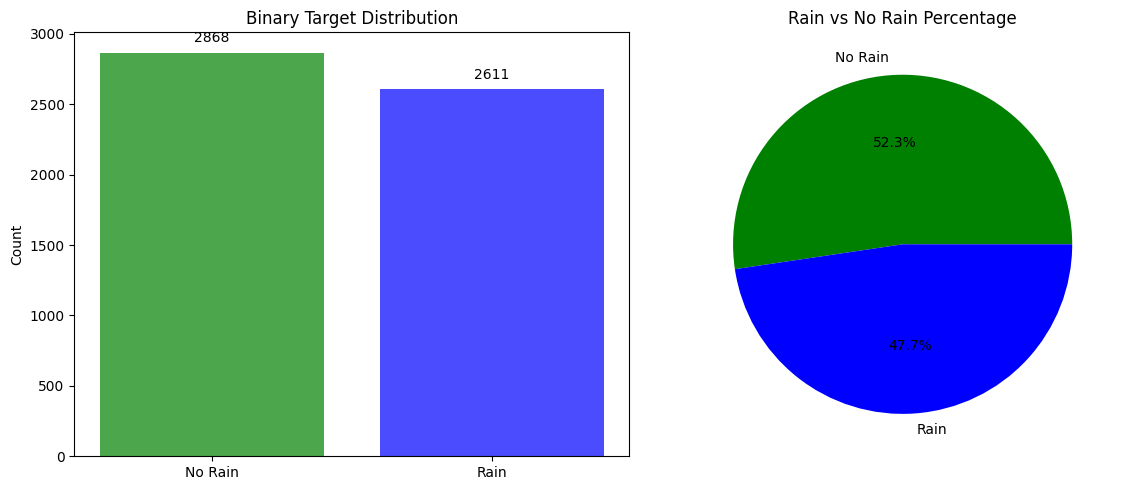

=== BINARY TARGET ANALYSIS ===
Total observations: 5479
Rain days: 2868 (52.3%)
No rain days: 2611 (47.7%)


In [29]:


plt.figure(figsize=(12, 5))

# 1. Binary target distribution (Rain vs No Rain)
plt.subplot(1, 2, 1)
rain_counts = df['rain_binary'].value_counts()
plt.bar(['No Rain', 'Rain'], rain_counts.values, color=['green', 'blue'], alpha=0.7)
plt.title('Binary Target Distribution')
plt.ylabel('Count')
for i, v in enumerate(rain_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')

# 2. Pie chart for binary distribution
plt.subplot(1, 2, 2)
labels = ['No Rain', 'Rain']
sizes = rain_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'blue'])
plt.title('Rain vs No Rain Percentage')

plt.tight_layout()
plt.show()

# Print summary statistics
print("=== BINARY TARGET ANALYSIS ===")
print(f"Total observations: {len(df)}")
print(f"Rain days: {rain_counts[1]} ({rain_counts[1]/len(df)*100:.1f}%)")
print(f"No rain days: {rain_counts[0]} ({rain_counts[0]/len(df)*100:.1f}%)")

In [30]:

# find rows where rain_sum == 0.1 (use np.isclose to avoid floating point issues)
mask = np.isclose(df['rain_sum'], 0.1)
count = int(mask.sum())
pct = mask.mean() * 100

print(f"Rows with rain_sum ≈ 0.1: {count} ({pct:.3f}%)")
# show a few examples
display(df.loc[mask])  # or: print(df.loc[mask].head().to_string())


Rows with rain_sum ≈ 0.1: 239 (4.362%)


,date,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,wind_speed_10m_max,wind_gusts_10m_max,...,vapour_pressure_deficit_max,soil_moisture_0_to_100cm_mean,soil_moisture_0_to_7cm_mean,soil_moisture_28_to_100cm_mean,soil_moisture_7_to_28cm_mean,soil_temperature_0_to_100cm_mean,soil_temperature_0_to_7cm_mean,soil_temperature_7_to_28cm_mean,soil_temperature_28_to_100cm_mean,rain_binary
49,2010-02-18 14:00:00+00:00,51.0,21.643412,23.370499,19.820500,22.353836,24.020819,21.023912,12.074766,32.399998,...,1.232203,0.197856,0.196958,0.189625,0.226375,22.963020,22.597582,22.566332,23.114248,1
56,2010-02-25 14:00:00+00:00,51.0,21.535082,23.820500,18.020500,22.200228,24.420424,18.869154,12.303366,33.480000,...,1.314471,0.174034,0.108250,0.181667,0.169792,22.965227,22.624670,22.539248,23.122581,1
122,2010-05-02 14:00:00+00:00,51.0,19.374664,21.670502,17.370499,19.749865,22.109283,17.337970,10.440000,24.119999,...,0.951230,0.137937,0.131250,0.141000,0.129667,19.567377,19.276750,19.239248,19.691332,0
203,2010-07-22 14:00:00+00:00,51.0,12.382999,14.670500,10.270500,10.749743,12.751032,8.230516,11.874544,33.839996,...,0.500295,0.206690,0.218458,0.203000,0.215417,13.054023,12.141335,12.251751,13.376752,1
294,2010-10-21 14:00:00+00:00,51.0,18.912165,23.020500,14.420500,19.798048,25.151041,14.913652,12.287555,25.199999,...,1.170170,0.160169,0.120542,0.166417,0.151958,17.591396,20.366333,18.830915,16.960085,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5342,2024-08-16 14:00:00+00:00,51.0,14.983334,18.887499,11.837500,12.148898,16.001570,8.595513,22.734219,39.239998,...,1.244478,0.217342,0.228625,0.208458,0.244042,14.035980,14.954165,14.860414,13.706252,1
5369,2024-09-12 14:00:00+00:00,51.0,13.654167,16.887499,9.787499,10.796597,14.605371,7.685010,25.620771,43.560000,...,0.852102,0.120242,0.081292,0.134125,0.085625,16.432877,15.674998,16.612500,16.454168,0
5423,2024-11-05 14:00:00+00:00,51.0,21.275000,27.037500,15.587500,22.486908,30.358974,16.526623,21.522614,38.519997,...,1.384133,0.089714,0.084417,0.088542,0.095500,19.592272,23.495832,21.514582,18.652082,1
5438,2024-11-20 14:00:00+00:00,51.0,19.695833,23.487500,16.287500,19.749876,24.500820,17.540833,19.987295,46.440000,...,1.463975,0.162415,0.073750,0.176625,0.143250,19.802816,21.756250,20.554169,19.393753,1


In [31]:
# <Student to fill this section>
target_distribution_explanations = """
provide a detailed analysis on the target variable, its distribution, limitations, issues, ...
- Summary

    - Target: rain_binary = (rain_sum > 0).astype(int). No nulls. Total = 5,479; Rain = 2,872 (52.4%); No rain = 2,607 (47.6%) — classes approximately balanced.

- Distribution
    - Binary: roughly balanced yes/no classes.
    - Underlying rain_sum is strongly right‑skewed: many small/zero measurements and a long tail of heavy events.
    The positive class therefore includes both trace and extreme rainfall.

- Limitations / issues
    - Threshold choice: using >0 treats any measurable precipitation (including sensor noise or trace drizzle) as a rain event — may overstate meaningful rainfall.
    - Loss of intensity: binary label discards severity (light vs heavy), which may be a little business‑relevant.
"""


In [32]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `wind_direction_10m_dominant`

In [33]:
# <Student to fill this section>
df.wind_direction_10m_dominant.head()

0    331.647500
1    298.610300
2    146.744640
3     69.884770
4     35.137077
Name: wind_direction_10m_dominant, dtype: float64

In [34]:
df.wind_direction_10m_dominant.isnull().sum()

np.int64(0)

There are no null values

In [35]:
df.wind_direction_10m_dominant.describe()

count    5479.000000
mean      180.656977
std       103.372295
min         0.100737
25%        83.010368
50%       182.750000
75%       272.036300
max       359.857450
Name: wind_direction_10m_dominant, dtype: float64

Wind Directions:

Divided into 16 compass directions:
Principal: N, E, S, W
Ordinal: NE, SE, SW, NW
Inter-ordinal: NNE, ENE, ESE, etc.

In [36]:
class WindDirectionCompassTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, input_col='wind_direction_10m_dominant', 
                 numeric_col='wind_direction_10m_dominant_deg',
                 compass_col='wind_dir_compass'):
        self.input_col = input_col
        self.numeric_col = numeric_col
        self.compass_col = compass_col
        self.dirs = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
                    'S','SSW','SW','WSW','W','WNW','NW','NNW']

    def deg_to_compass(self, deg):
        """Convert degrees to 16-point compass direction"""
        try:
            deg = float(deg)
            if np.isnan(deg):
                return np.nan
        except (ValueError, TypeError):
            return np.nan
        
        idx = int(((deg + 11.25) % 360) / 22.5)
        return self.dirs[idx]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        if self.input_col not in X.columns:
            raise KeyError(f"Column '{self.input_col}' not found in input data.")
        
        # Convert to numeric (handles strings/missing values)
        X[self.numeric_col] = pd.to_numeric(X[self.input_col], errors='coerce')
        
        # Apply compass conversion
        X[self.compass_col] = X[self.numeric_col].apply(
            lambda x: self.deg_to_compass(x) if pd.notna(x) else np.nan
        )
        
        return X

# Example usage in a pipeline
wind_compass_pipeline = Pipeline(steps=[
    ('wind_direction_compass', WindDirectionCompassTransformer(
        input_col='wind_direction_10m_dominant',
        numeric_col='wind_direction_10m_dominant_deg',
        compass_col='wind_dir_compass'
    ))
])

# Apply the pipeline to the dataframe
try:
    df = wind_compass_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df[['wind_direction_10m_dominant', 'wind_direction_10m_dominant_deg', 'wind_dir_compass']].head())
    print("\nCompass direction value counts:")
    print(df['wind_dir_compass'].value_counts(dropna=False))
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
   wind_direction_10m_dominant  wind_direction_10m_dominant_deg  \
0                   331.647500                       331.647500   
1                   298.610300                       298.610300   
2                   146.744640                       146.744640   
3                    69.884770                        69.884770   
4                    35.137077                        35.137077   

  wind_dir_compass  
0              NNW  
1              WNW  
2              SSE  
3              ENE  
4               NE  

Compass direction value counts:
wind_dir_compass
NE     529
S      493
SSE    436
WNW    418
W      406
SSW    405
NNE    364
NW     357
ENE    301
NNW    297
WSW    280
SW     279
N      265
SE     245
E      210
ESE    194
Name: count, dtype: int64


The majority of entries are concentrated in the directions NE, S, SSE, WNW, W, and SSW, each exceeding 400 observations.

Lets visualize it

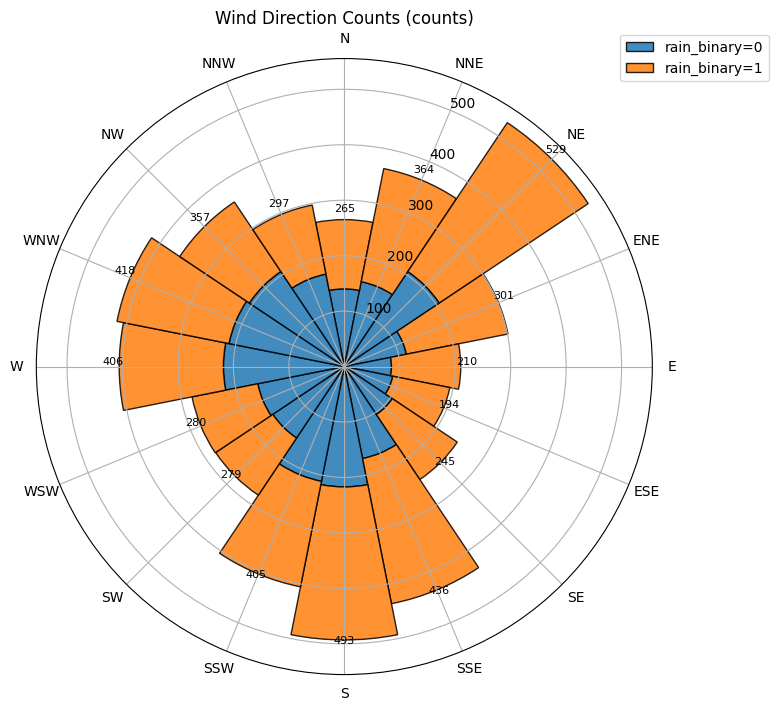

In [37]:

def deg_to_compass(deg):
    try:
        deg = float(deg)
    except Exception:
        return np.nan
    dirs = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
            'S','SSW','SW','WSW','W','WNW','NW','NNW']
    # map to [0,360) and pick bin by center offsets
    idx = int(((deg + 11.25) % 360) / 22.5)
    return dirs[idx]

def create_direction_count(df, normalize=False, groupby_target=None, target_order=None, colors=None):
    """
    Count wind directions by 16 compass bins and plot a polar bar chart.
    - normalize: if True, show frequencies (sum=1) rather than raw counts.
    - groupby_target: column name (e.g. 'rain_binary') to split counts and show legend.
    - target_order: optional list specifying order of target values for consistent colors/legend.
    - colors: optional list of colors to use for stacked segments.
    Returns matplotlib Figure.
    """
    dir_labels = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
                  'S','SSW','SW','WSW','W','WNW','NW','NNW']

    deg_col = 'wind_direction_10m_dominant_deg'
    if deg_col not in df.columns:
        if 'wind_direction_10m_dominant' in df.columns:
            df[deg_col] = pd.to_numeric(df['wind_direction_10m_dominant'], errors='coerce')
        else:
            raise ValueError("No wind direction column found")

    deg = df[deg_col].dropna().astype(float) % 360
    labels = deg.map(deg_to_compass)

    # If grouping by a target column, compute cross-tab counts per direction x target_value
    if groupby_target is not None and groupby_target in df.columns:
        target_vals = df.loc[deg.index, groupby_target]  # align with deg series
        counts_df = pd.crosstab(labels, target_vals).reindex(index=dir_labels).fillna(0)
        # ensure consistent column order
        if target_order is not None:
            counts_df = counts_df.reindex(columns=target_order, fill_value=0)
        else:
            counts_df = counts_df.reindex(columns=sorted(counts_df.columns), fill_value=0)

        if normalize:
            total = counts_df.values.sum()
            if total > 0:
                counts_df = counts_df / total

        plot_cols = list(counts_df.columns)
        plot_vals = counts_df.values  # shape (16, n_targets)

        # prepare plotting
        centers_deg = np.arange(0, 360, 22.5)
        centers_rad = np.deg2rad(centers_deg)
        width_rad = np.deg2rad(22.5)

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='polar')

        # default colors if not provided
        if colors is None:
            base_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
            # choose or cycle colors for number of target classes
            colors = [base_colors[i % len(base_colors)] for i in range(len(plot_cols))]

        bottom = np.zeros(len(centers_rad))
        bars_by_target = []
        for i, col in enumerate(plot_cols):
            vals = plot_vals[:, i].astype(float)
            bars = ax.bar(centers_rad, vals, width=width_rad, bottom=bottom,
                          align='center', alpha=0.85, color=colors[i], edgecolor='k')
            bars_by_target.append(bars)
            bottom = bottom + vals  # accumulate for stacking

        # annotate totals on top of stacks
        totals = plot_vals.sum(axis=1)
        for idx, tot in enumerate(totals):
            if tot > 0:
                ax.text(centers_rad[idx], tot + (0.02 * totals.max()), f"{tot:.0f}" if not normalize else f"{tot:.2f}",
                        ha='center', va='bottom', fontsize=8)

        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        ax.set_xticks(centers_rad)
        ax.set_xticklabels(dir_labels)
        ax.set_title('Wind Direction Counts' + (' (frequency)' if normalize else ' (counts)'))

        # legend labels show target values (use column names from counts_df)
        legend_labels = [f"{groupby_target}={c}" for c in plot_cols]
        ax.legend([b[0] for b in bars_by_target], legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1.05))
        return fig

    # --- fallback: single series (no grouping) ---
    counts = labels.value_counts().reindex(dir_labels).fillna(0).astype(float)

    if normalize:
        total = counts.sum()
        if total > 0:
            counts = counts / total

    centers_deg = np.arange(0, 360, 22.5)
    centers_rad = np.deg2rad(centers_deg)
    width_rad = np.deg2rad(22.5)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='polar')
    bars = ax.bar(centers_rad, counts.values, width=width_rad, bottom=0.0, align='center', alpha=0.8)

    # annotate
    for bar, c in zip(bars, counts.values):
        h = bar.get_height()
        if h > 0:
            txt = f"{c:.2f}" if normalize else str(int(c))
            ax.text(bar.get_x() + bar.get_width()/2, h + (0.02 * counts.max() if not normalize else 0.02),
                    txt, ha='center', va='bottom', fontsize=8)

    ax.set_theta_direction(-1)
    ax.set_theta_zero_location('N')
    ax.set_xticks(centers_rad)
    ax.set_xticklabels(dir_labels)
    ax.set_title('Wind Direction Counts' + (' (frequency)' if normalize else ' (counts)'))

    return fig


# call the function and show rain_binary as legend
dir_count_fig = create_direction_count(df, normalize=False, groupby_target='rain_binary')


In [38]:
# <Student to fill this section>
feature_1_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

Summary
- Feature: wind_direction_10m_dominant (binned to 16 compass points).
- Sample size: 5,479 observations.
- Top directions: NE (529, 9.65%), S (493, 8.99%), SSE (436, 7.96%).
- N has 265 observations (4.84%) — noticeably lower than some neighboring bins.

Distribution & patterns
- Distribution is roughly multimodal rather than uniform; some directions (NE, S, SSE, WNW) appear more common.
- The counts sum to the dataset size (no hidden duplication after label-first binning).

"""

In [39]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `wind_speed_10m_mean`

In [40]:
# <Student to fill this section>
df.wind_speed_10m_mean.head()

0    10.419551
1     8.355687
2    12.964748
3    11.067534
4     9.724721
Name: wind_speed_10m_mean, dtype: float64

In [41]:
df.wind_speed_10m_mean.describe()

count    5479.000000
mean       11.929918
std         4.588791
min         3.419965
25%         8.544684
50%        10.986862
75%        14.487137
max        37.387234
Name: wind_speed_10m_mean, dtype: float64

In [42]:
df.wind_speed_10m_mean.isnull().sum()

np.int64(0)

There are no null values

In [43]:

# define speed bins and labels, then create a binned column and show counts

speed_bins = [0, 2, 4, 6, 8, 10, np.inf]
speed_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']

# create binned column (adjust right=True/False depending on inclusion preference)
df['wind_speed_bin'] = pd.cut(df['wind_speed_10m_mean'], bins=speed_bins, labels=speed_labels, right=False, include_lowest=True)

# quick check
print(df['wind_speed_bin'].value_counts(dropna=False))


wind_speed_bin
>10     3295
8-10    1130
6-8      818
4-6      228
2-4        8
0-2        0
Name: count, dtype: int64


WE can see that most of the values are above 10 we will see if there is a pattern with the target column

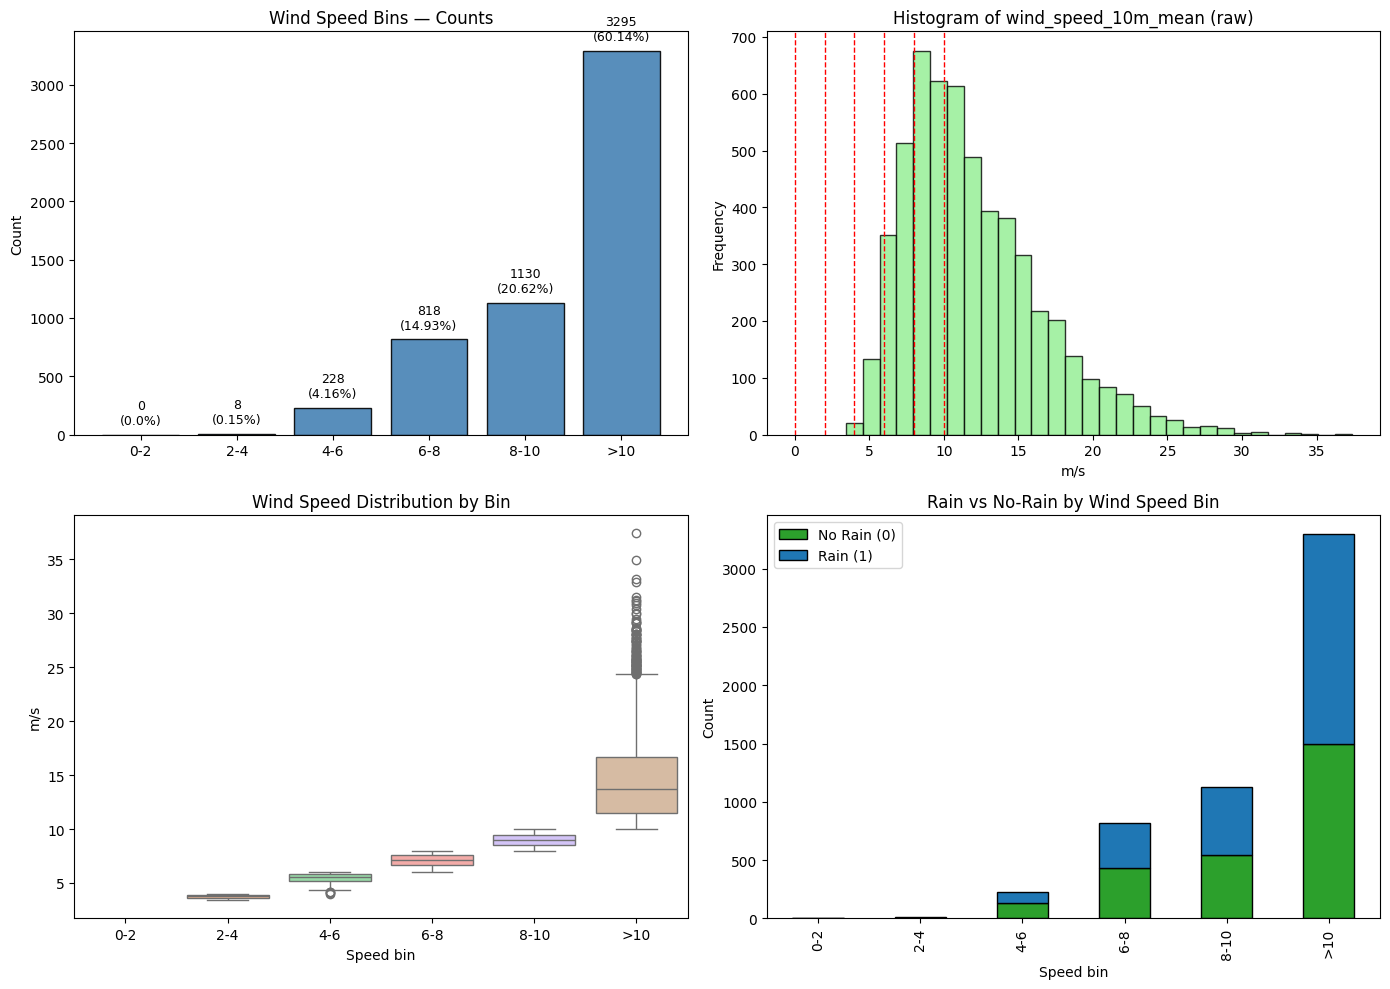

done


In [44]:

def visualize_wind_speed_bins(df, speed_bins=None, speed_labels=None, show=True):
    """
    Nicely formatted 2x2 visualization for wind_speed_10m_mean:
      - top-left: counts per bin (bar)
      - top-right: raw histogram with bin edges
      - bottom-left: boxplot of speeds by bin
      - bottom-right: stacked bar of rain/no-rain per bin (if rain_binary exists)
    Returns matplotlib Figure.
    """


    # defaults
    if speed_bins is None:
        speed_bins = [0, 2, 4, 6, 8, 10, np.inf]
    if speed_labels is None:
        speed_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']

    # validations
    if 'wind_speed_10m_mean' not in df.columns:
        raise KeyError("DataFrame must contain 'wind_speed_10m_mean'")

    # create binned column if missing
    if 'wind_speed_bin' not in df.columns:
        df['wind_speed_bin'] = pd.cut(
            df['wind_speed_10m_mean'],
            bins=speed_bins,
            labels=speed_labels,
            right=False,
            include_lowest=True
        )

    # counts & percentages (ordered)
    speed_counts = df['wind_speed_bin'].value_counts().reindex(speed_labels).fillna(0).astype(int)
    speed_pct = (speed_counts / speed_counts.sum() * 100).round(2)

    # figure layout
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    ax = axs[0, 0]
    bars = ax.bar(speed_labels, speed_counts.values, color='steelblue', edgecolor='k', alpha=0.9)
    ax.set_title('Wind Speed Bins — Counts')
    ax.set_ylabel('Count')
    for bar, cnt, pct in zip(bars, speed_counts.values, speed_pct.values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            cnt + max(1, speed_counts.max() * 0.02),
            f"{cnt}\n({pct}%)",
            ha='center',
            va='bottom',
            fontsize=9
        )

    ax = axs[0, 1]
    clean_speed = df['wind_speed_10m_mean'].dropna()
    ax.hist(clean_speed, bins=30, color='lightgreen', edgecolor='k', alpha=0.8)
    # draw bin edges (skip +inf)
    for edge in speed_bins[:-1]:
        if np.isfinite(edge):
            ax.axvline(edge, color='red', linestyle='--', linewidth=1)
    ax.set_title('Histogram of wind_speed_10m_mean (raw)')
    ax.set_xlabel('m/s')
    ax.set_ylabel('Frequency')

    ax = axs[1, 0]
    sns.boxplot(
        x='wind_speed_bin',
        y='wind_speed_10m_mean',
        data=df,
        order=speed_labels,
        palette='pastel',
        ax=ax
    )
    ax.set_title('Wind Speed Distribution by Bin')
    ax.set_xlabel('Speed bin')
    ax.set_ylabel('m/s')

    ax = axs[1, 1]
    if 'rain_binary' in df.columns:
        cross = (
            df.groupby(['wind_speed_bin', 'rain_binary'])
              .size()
              .unstack(fill_value=0)
              .reindex(index=speed_labels)
        )
        if cross.empty:
            ax.text(0.5, 0.5, 'No data for bins', ha='center', va='center')
        else:
            # choose colors up to number of columns
            colors = ['#2ca02c', '#1f77b4'][:cross.shape[1]]
            cross.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='k')
            ax.set_title('Rain vs No-Rain by Wind Speed Bin')
            ax.set_xlabel('Speed bin')
            ax.set_ylabel('Count')
            if cross.shape[1] == 2:
                ax.legend(['No Rain (0)', 'Rain (1)'])
            else:
                ax.legend(title='rain_binary')
    else:
        ax.text(0.5, 0.5, "'rain_binary' column not found", ha='center', va='center')

    plt.tight_layout()
    if show:
        plt.show()
    return fig

# call the function (keeps the notebook cell tidy)
visualize_wind_speed_bins(df)
print('done')


Wind Speed Distribution: The majority of wind speeds are above 10 m/s, accounting for 60.12% of observations.
Rain vs No Rain: Higher wind speeds (>10 m/s) show a stronger association with rain events compared to lower wind speed bins.
Skewness: Wind speed data is right-skewed, with a long tail of higher values.

In [45]:
# <Student to fill this section>
feature_2_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

Summary
Feature Type: Continuous numeric variable.
Distribution: Right-skewed, with 60.12% of values above 10 m/s.
Rain Association: Higher wind speeds (>10 m/s) correlate with rain events.


Limitations
Skewness: May bias models; requires transformation (e.g., log1p).
Outliers: Extreme values need capping or removal.
Bin Imbalance: Lower bins (e.g., 0–2 m/s) are underrepresented.

"""

In [46]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.7 Explore Feature of Interest `apparent_temperature_mean`


In [47]:
# <Student to fill this section>
df.apparent_temperature_mean.head()


0    25.151611
1    26.942467
2    19.709002
3    21.016272
4    24.393919
Name: apparent_temperature_mean, dtype: float64

In [48]:
df.apparent_temperature_mean.describe()

count    5479.000000
mean       16.856444
std         5.832069
min         3.497893
25%        12.028370
50%        16.776638
75%        21.570835
max        32.557170
Name: apparent_temperature_mean, dtype: float64

In [49]:
df.apparent_temperature_mean.isnull().sum()

np.int64(0)

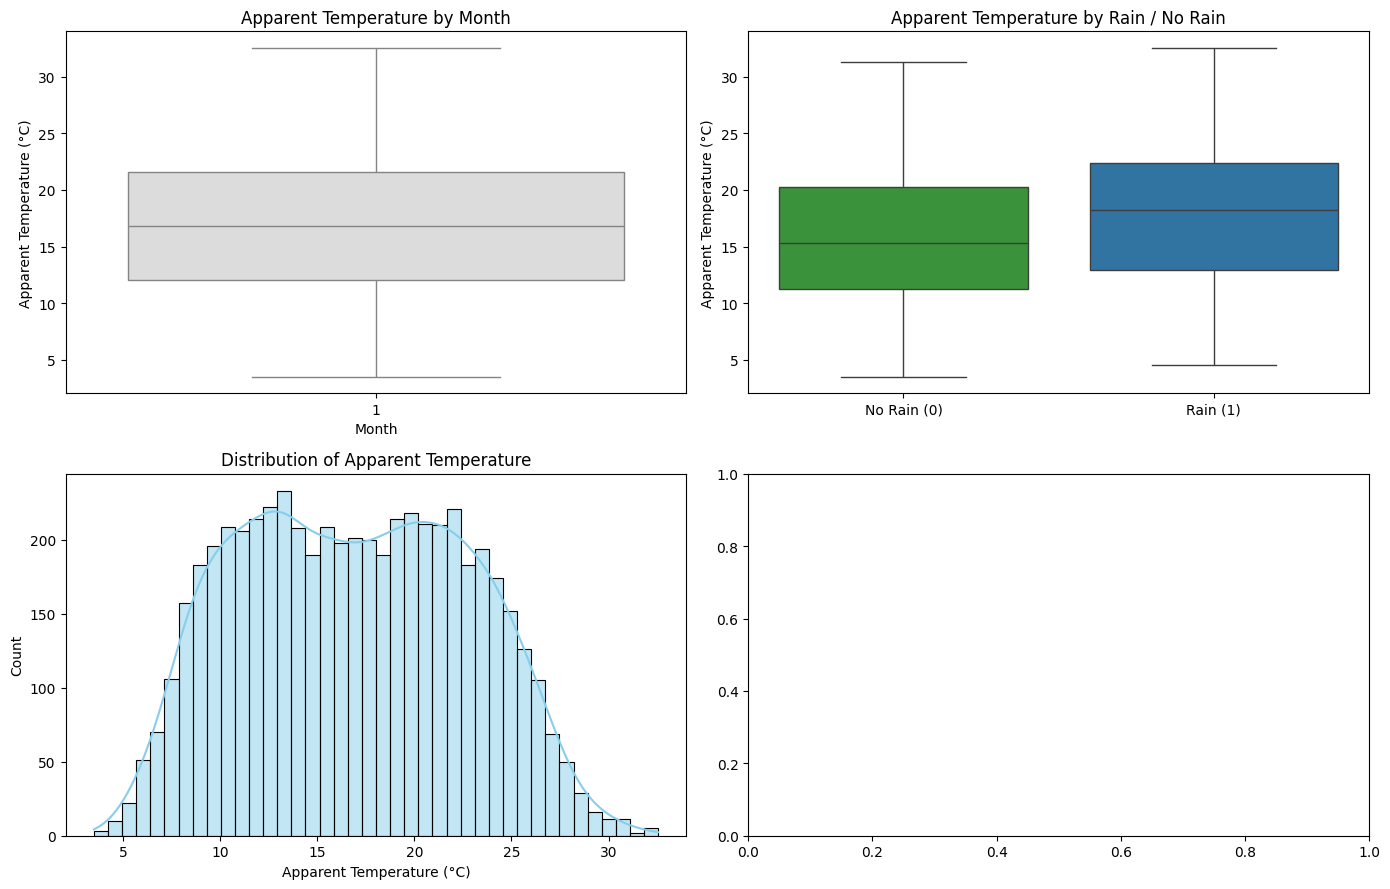

In [50]:

# Visualize apparent_temperature_mean (4-panel)
if 'apparent_temperature_mean' not in df.columns:
    raise KeyError("Column 'apparent_temperature_mean' not found in df")

# ensure month/hour exist (create from 'time' if needed)
if 'month' not in df.columns or 'hour' not in df.columns:
    if 'time' in df.columns:
        df['time'] = pd.to_datetime(df['time'], errors='coerce')
        df['month'] = df['time'].dt.month
        df['hour'] = df['time'].dt.hour
    else:
        try:
            idx = pd.to_datetime(df.index)
            df['month'] = idx.month
            df['hour'] = idx.hour
        except Exception:
            df['month'] = np.nan
            df['hour'] = np.nan

fig, axs = plt.subplots(2, 2, figsize=(14, 9))

# 1) Boxplot by month
ax = axs[0, 0]
sns.boxplot(data=df, x='month', y='apparent_temperature_mean', ax=ax, palette='coolwarm')
ax.set_title('Apparent Temperature by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Apparent Temperature (°C)')

# 2) Boxplot split by rain_binary (if present)
ax = axs[0, 1]
if 'rain_binary' in df.columns:
    sns.boxplot(data=df, x='rain_binary', y='apparent_temperature_mean', ax=ax, palette=['#2ca02c','#1f77b4'])
    ax.set_xticklabels(['No Rain (0)', 'Rain (1)'])
    ax.set_title('Apparent Temperature by Rain / No Rain')
    ax.set_xlabel('')
    ax.set_ylabel('Apparent Temperature (°C)')
else:
    ax.text(0.5, 0.5, "'rain_binary' not found", ha='center', va='center')
    ax.set_axis_off()

# 3) Histogram + KDE
ax = axs[1, 0]
vals = df['apparent_temperature_mean'].dropna()
sns.histplot(vals, bins=40, kde=True, color='skyblue', ax=ax)
ax.set_title('Distribution of Apparent Temperature')
ax.set_xlabel('Apparent Temperature (°C)')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [51]:
# <Student to fill this section>
feature_n_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

Summary

- Numeric continuous feature representing the “feels‑like” temperature.
- Distribution appears roughly bell‑shaped with mean/median in the mid teens to low twenties and tails down to ~3°C and up to ~33°C (see histogram).


Distribution & patterns

- Approximately symmetric (near‑normal) bulk with light tails; no extreme skewness visible.
- Clear seasonal signal: median and spread vary by month (warmer months shift median upward and increase upper tail).
- Slight difference by rain/no‑rain: boxplots show distributions for rain vs no‑rain overlap but medians/variability may differ.

"""

In [52]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

### C.n Explore Feature of Interest `\<put feature name here\>`

> You can add more cells related to other feeatures in this section

---
## D. Feature Selection


### D.1 Approach "Removing the data leakage columns"


In [53]:
temp=df.copy()

In [54]:
cols_to_drop=['weather_code','snowfall_sum','snowfall_water_equivalent_sum','precipitation_sum','precipitation_hours','rain_sum']


In [55]:


# Define a custom transformer to drop columns
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')

# Specify the columns to drop
cols_to_drop = ['weather_code', 'snowfall_sum', 'snowfall_water_equivalent_sum',
                'precipitation_sum', 'precipitation_hours', 'rain_sum']

# Create the pipeline
drop_columns_pipeline = Pipeline(steps=[
    ('drop_columns', DropColumnsTransformer(columns_to_drop=cols_to_drop))
])

# Apply the pipeline to the dataframe
try:
    df = drop_columns_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_max  \
0  2009-12-31 14:00:00+00:00            22.964250           25.670502   
1  2010-01-01 14:00:00+00:00            23.612165           26.920502   
2  2010-01-02 14:00:00+00:00            19.882996           20.620499   
3  2010-01-03 14:00:00+00:00            20.887167           22.520500   
4  2010-01-04 14:00:00+00:00            22.520498           26.020500   

   temperature_2m_min  apparent_temperature_mean  apparent_temperature_max  \
0           21.070500                  25.151611                 26.715890   
1           20.970500                  26.942467                 32.614998   
2           19.470500                  19.709002                 21.280840   
3           19.220500                  21.016272                 22.343325   
4           18.620499                  24.393919                 30.018890   

   apparent_temperature_min  wind_spee

In [56]:
# should be True if identical

In [57]:
# <Student to fill this section>
feature_selection_1_insights = """
provide an explanation on why you use this approach for feature selection and describe its results


Reasons for dropping columns to avoid data leakage:
- weather_code: Encodes observed weather (includes precipitation) and can act as a direct surrogate for the target.
- snowfall_sum: Direct measurement of precipitation (snow) — leaks precipitation information.
- snowfall_water_equivalent_sum: Another direct precipitation metric — leaks target signal.
- precipitation_sum: Aggregate precipitation amount — direct leakage of rainfall magnitude.
- precipitation_hours: Indicates duration/occurrence of precipitation — leaks timing of rain events.
- rain_sum: Exact rainfall amount used to derive the binary target — direct target leakage.
"""


In [58]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "Correlation"


In [59]:
# <Student to fill this section>


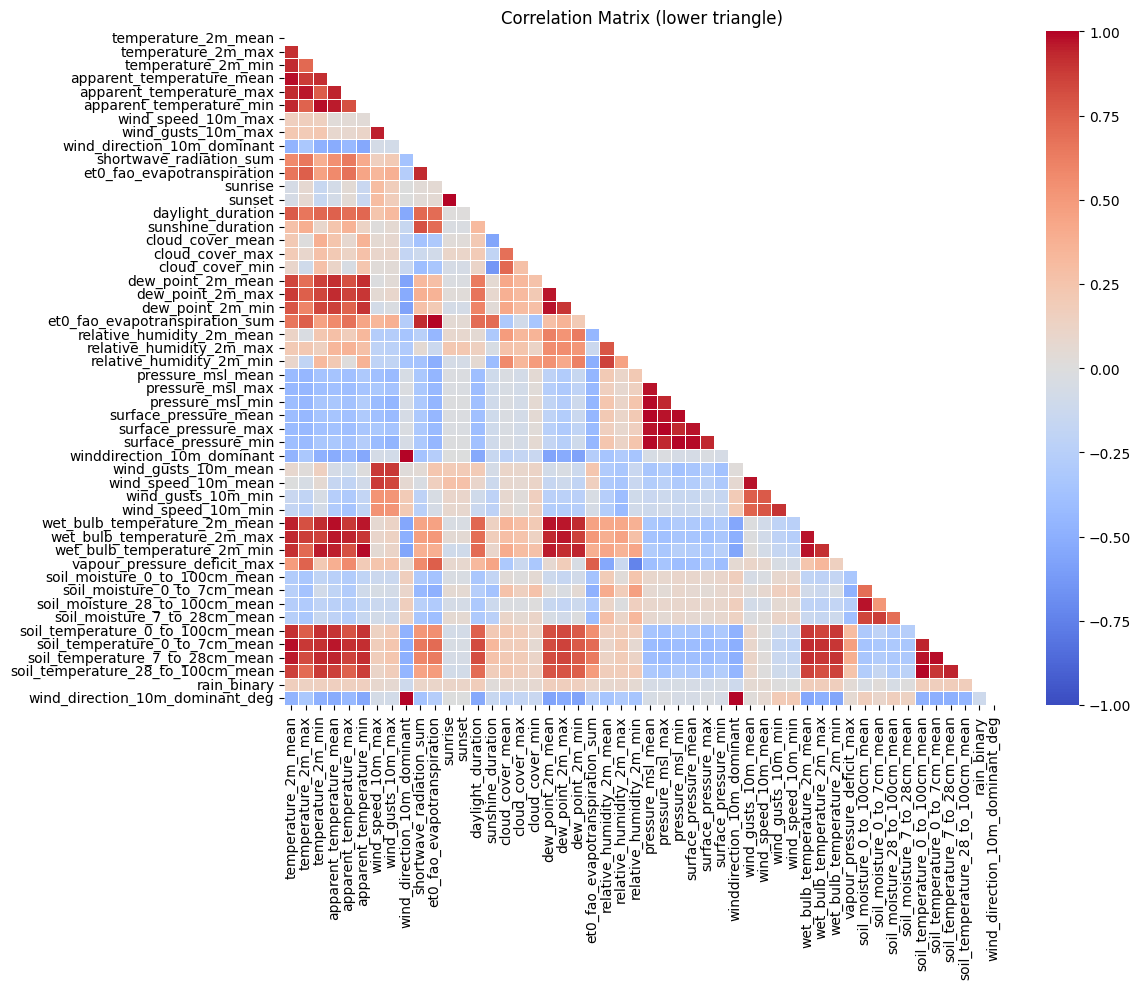

In [60]:

# <Student to fill this section>
# Compute correlations with target



# select numeric features (including the target)
num = df.select_dtypes(include=[np.number]).copy()

# drop columns with all-NaN or constant values to avoid useless correlations
num = num.loc[:, num.isna().mean() < 1.0]  # keep columns not completely null
num = num.loc[:, num.nunique(dropna=True) > 1]  # drop constant columns

# correlation matrix
corr = num.corr()

# 2) Full correlation matrix heatmap (masked upper triangle)
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (lower triangle)')
plt.tight_layout()
plt.show()


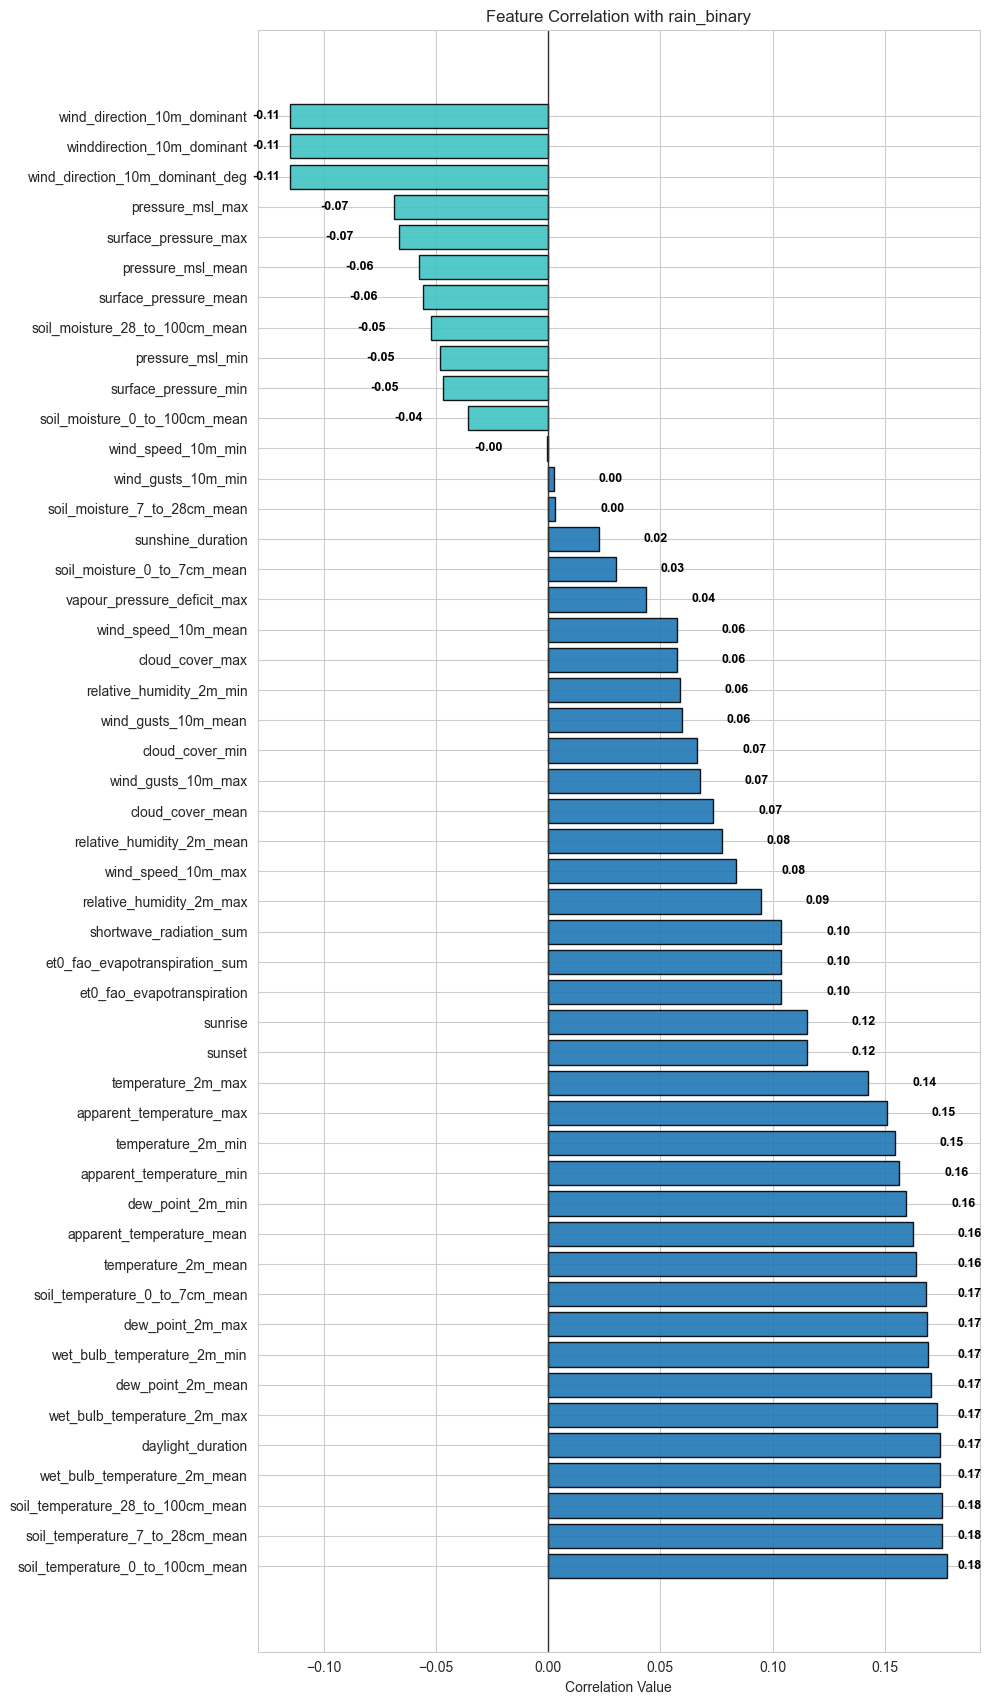

In [61]:
# compute correlations
corr = num.corr()
corr_with_target = corr['rain_binary'].drop('rain_binary').sort_values()  # ascending
# use seaborn style safely — some environments don't expose matplotlib 'seaborn-*' styles
try:
    plt.style.use('seaborn-whitegrid')
except Exception:
    try:
        sns.set_style('whitegrid')      # fallback to seaborn API
    except Exception:
        plt.style.use('default')       # final fallback

fig, ax = plt.subplots(figsize=(10, max(6, len(corr_with_target)*0.35)))

y = np.arange(len(corr_with_target))
vals = corr_with_target.values
labels = corr_with_target.index.tolist()

# colors: teal for negative, blue for positive (match example)
colors = ['#40c4c4' if v < 0 else '#1f77b4' for v in vals]

ax.barh(y, vals, color=colors, edgecolor='k', alpha=0.9)
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=10)
ax.invert_yaxis()
ax.axvline(0, color='0.2', linewidth=1)

# annotate values on bars (keep annotations inside figure bounds)
xpad = 0.02
for i, v in enumerate(vals):
    if v < 0:
        ha = 'right'
        xpos = v - xpad
    else:
        ha = 'left'
        xpos = v + xpad
    # clamp xpos to axis limits to avoid text disappearing
    xmin, xmax = ax.get_xlim()
    xpos = max(min(xpos, xmax - 0.01), xmin + 0.01)
    ax.text(xpos, i, f"{v:.2f}", va='center', ha=ha, fontsize=9, color='black', weight='bold')

ax.set_xlabel('Correlation Value')
ax.set_title('Feature Correlation with rain_binary')
plt.tight_layout()
plt.show()


In [62]:
# Step 1: Identify low-correlation features outside the pipeline
class IdentifyLowCorrelationFeatures:
    def __init__(self, target_column, threshold=(-0.1, 0.1)):
        self.target_column = target_column
        self.threshold = threshold
        self.low_corr_features = []

    def fit(self, X, y=None):
        # Combine X and y if y is provided separately
        if y is not None:
            X = X.copy()
            X[self.target_column] = y

        # Select numeric columns
        num = X.select_dtypes(include=[np.number]).copy()
        num = num.loc[:, num.nunique(dropna=True) > 1]  # Drop constant columns

        # Compute correlation with the target
        corr_with_target = num.corr().get(self.target_column)
        if corr_with_target is None:
            raise KeyError(f"Target '{self.target_column}' not found in numeric columns for correlation")

        # Identify low-correlation features
        low_corr_mask = corr_with_target.between(self.threshold[0], self.threshold[1])
        self.low_corr_features = corr_with_target[low_corr_mask].drop(self.target_column, errors='ignore').index.tolist()
        return self

# Instantiate and fit the IdentifyLowCorrelationFeatures class
low_corr_identifier = IdentifyLowCorrelationFeatures(target_column='rain_binary', threshold=(-0.1, 0.1))
low_corr_identifier.fit(df, y=df['rain_binary'])

# Get the list of low-correlation features
low_corr_features = low_corr_identifier.low_corr_features
print(f"Low-correlation features: {low_corr_features}")

# Step 2: Use the identified low-correlation features in the pipeline
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')



Low-correlation features: ['wind_speed_10m_max', 'wind_gusts_10m_max', 'sunshine_duration', 'cloud_cover_mean', 'cloud_cover_max', 'cloud_cover_min', 'relative_humidity_2m_mean', 'relative_humidity_2m_max', 'relative_humidity_2m_min', 'pressure_msl_mean', 'pressure_msl_max', 'pressure_msl_min', 'surface_pressure_mean', 'surface_pressure_max', 'surface_pressure_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean', 'wind_gusts_10m_min', 'wind_speed_10m_min', 'vapour_pressure_deficit_max', 'soil_moisture_0_to_100cm_mean', 'soil_moisture_0_to_7cm_mean', 'soil_moisture_28_to_100cm_mean', 'soil_moisture_7_to_28cm_mean']


In [63]:
len(low_corr_features)

24

In [64]:
low_corr_features=['wind_speed_10m_max', 'wind_gusts_10m_max', 'sunshine_duration', 'cloud_cover_mean', 'cloud_cover_max', 'cloud_cover_min', 'relative_humidity_2m_mean', 'relative_humidity_2m_max', 'relative_humidity_2m_min', 'pressure_msl_mean', 'pressure_msl_max', 'pressure_msl_min', 'surface_pressure_mean', 'surface_pressure_max', 'surface_pressure_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean', 'wind_gusts_10m_min', 'wind_speed_10m_min', 'vapour_pressure_deficit_max', 'soil_moisture_0_to_100cm_mean', 'soil_moisture_0_to_7cm_mean', 'soil_moisture_28_to_100cm_mean', 'soil_moisture_7_to_28cm_mean']
# Create the pipeline
low_corr_pipeline = Pipeline(steps=[
    ('drop_low_corr', DropColumnsTransformer(columns_to_drop=low_corr_features))
])

# Apply the pipeline to the dataframe
try:
    df = low_corr_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_max  \
0  2009-12-31 14:00:00+00:00            22.964250           25.670502   
1  2010-01-01 14:00:00+00:00            23.612165           26.920502   
2  2010-01-02 14:00:00+00:00            19.882996           20.620499   
3  2010-01-03 14:00:00+00:00            20.887167           22.520500   
4  2010-01-04 14:00:00+00:00            22.520498           26.020500   

   temperature_2m_min  apparent_temperature_mean  apparent_temperature_max  \
0           21.070500                  25.151611                 26.715890   
1           20.970500                  26.942467                 32.614998   
2           19.470500                  19.709002                 21.280840   
3           19.220500                  21.016272                 22.343325   
4           18.620499                  24.393919                 30.018890   

   apparent_temperature_min  wind_dire

In [65]:
# <Student to fill this section>
feature_selection_2_insights = """
provide an explanation on why you use this approach for feature selection and describe its results

Removed numeric features whose Pearson correlation with the target (rain_binary) is weak (|corr| <= 0.1).
Rationale: a simple, fast filter to remove largely uninformative features, reduce noise and model complexity, and speed up training.
Caveat: this only captures linear relationships — non-linear predictors should be tested separately.
Result: low‑correlation numeric columns were dropped; remaining features have stronger linear association with the target.


"""

In [66]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "\<describe_approach_here\>"

> You can add more cells related to other approaches in this section

## D.z Final Selection of Features

In [67]:

# Define a custom transformer to drop specific columns
class DropSpecificColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')

# Specify the columns to drop
columns_to_drop = ['month', 'hour']

# Create the pipeline
drop_columns_pipeline = Pipeline(steps=[
    ('drop_specific_columns', DropSpecificColumns(columns_to_drop=columns_to_drop))
])

# Apply the pipeline to the dataframe
try:
    df = drop_columns_pipeline.fit_transform(df)
    features_list = df.columns.drop('rain_binary').tolist()  # Update the feature list
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.info())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5479 entries, 0 to 5478
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   date                               5479 non-null   object  
 1   temperature_2m_mean                5479 non-null   float64 
 2   temperature_2m_max                 5479 non-null   float64 
 3   temperature_2m_min                 5479 non-null   float64 
 4   apparent_temperature_mean          5479 non-null   float64 
 5   apparent_temperature_max           5479 non-null   float64 
 6   apparent_temperature_min           5479 non-null   float64 
 7   wind_direction_10m_dominant        5479 non-null   float64 
 8   shortwave_radiation_sum            5479 non-null   float64 
 9   et0_fao_evapotranspiration         5479 non-null   float64 
 10  sunrise                            5479 non-null   int

In [68]:
# <Student to fill this section>
feature_selection_explanations = """
provide a quick explanation on the features selected

Selected features (target 'rain_binary' excluded).
Why: removed leakage columns and then filtered numeric features with weak Pearson correlation (|corr| <= 0.1) to reduce noise and model complexity.
Result: remaining features are those with clearer linear signal to the target; sample:

"""

In [69]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Cleaning `Outliers`

In [70]:
# <Student to fill this section>

In [71]:

def detect_outliers_iqr(df, cols=None, k=1.5):
    """
    Returns a boolean DataFrame (same index/cols) where True indicates an outlier per IQR rule:
    value < Q1 - k*IQR or value > Q3 + k*IQR
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    out = pd.DataFrame(False, index=df.index, columns=cols)
    for c in cols:
        series = df[c].dropna()
        if series.empty:
            continue
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        out.loc[:, c] = (df[c] < lower) | (df[c] > upper)
    return out

def detect_outliers_zscore(df, cols=None, thresh=3.0):
    """
    Returns a boolean DataFrame where True indicates |(x - mean)/std| > thresh.
    Uses population std (ddof=0) to be conservative; ignores NaNs.
    """
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    out = pd.DataFrame(False, index=df.index, columns=cols)
    for c in cols:
        series = df[c]
        if series.dropna().shape[0] < 2:
            continue
        mu = series.mean()
        sigma = series.std(ddof=0)
        if sigma == 0 or np.isnan(sigma):
            continue
        z = (series - mu) / sigma
        out[c] = z.abs() > thresh
    return out

# Example usage: compute and summarize outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('rain_binary', errors='ignore').tolist()

iqr_out = detect_outliers_iqr(df, cols=numeric_cols, k=1.5)
z_out = detect_outliers_zscore(df, cols=numeric_cols, thresh=3.0)
raw_iqr_out=iqr_out
raw_z_out=z_out

# combine (True if flagged by either method)
outlier_flags = iqr_out | z_out

# summary counts per column and percent
outlier_counts = outlier_flags.sum().sort_values(ascending=False)
outlier_pct = (outlier_counts / len(df) * 100).round(3)
out_summary = pd.DataFrame({'count': outlier_counts, 'pct': outlier_pct})
display(out_summary[out_summary['count'] > 0])

# rows that have any outlier
rows_with_outliers = outlier_flags.any(axis=1)
print(f"Rows with any outlier: {rows_with_outliers.sum()} / {len(df)} ({rows_with_outliers.mean()*100:.2f}%)")

# show a few example rows with outliers and which cols are flagged
if rows_with_outliers.any():
    sample_idx = df.index[rows_with_outliers][:10]
    display(pd.concat([df.loc[sample_idx, numeric_cols], outlier_flags.loc[sample_idx, numeric_cols].astype(int)],
                      keys=['values','outlier_flag'], axis=1))


,count,pct
temperature_2m_max,50,0.913
et0_fao_evapotranspiration,31,0.566
et0_fao_evapotranspiration_sum,31,0.566
apparent_temperature_max,12,0.219
temperature_2m_mean,3,0.055
wet_bulb_temperature_2m_max,1,0.018
dew_point_2m_min,1,0.018
dew_point_2m_max,1,0.018


Rows with any outlier: 67 / 5479 (1.22%)


values                                        \
     temperature_2m_mean temperature_2m_max temperature_2m_min   
22             28.178833          37.320500          21.220500   
396            28.626749          34.770500          22.420502   
398            28.312164          35.920500          23.870499   
400            30.466340          36.320500          23.820500   
1103           30.333000          37.870502          21.120499   
1113           29.099665          39.320500          21.520500   
1378           24.947580          32.820500          17.770500   
1381           23.178839          31.670502          14.520500   
1385           22.653833          30.670502          17.320500   
2149           27.308004          36.120502          19.920502   

                                                         \
     apparent_temperature_mean apparent_temperature_max   
22                   27.267279                37.459830   
396                  31.289050                37.081497   
398                  31.045898                37.600820   
400                  32.557170                37.978530   
1103                 29.244669                36.295567   
1113                 30.940271                40.728610   
1378                 21.778114                29.093822   
1381                 20.783686                26.856531   
1385                 18.353750                25.731066   
2149                 28.215866                34.537790   

                                                           \
     apparent_temperature_min wind_direction_10m_dominant   
22                  20.298960                   254.17375   
396                 26.229681                   322.57690   
398                 26.694696                   247.23660   
400                 28.333252                   328.06604   
1103                22.310087                   323.07062   
1113                21.665451                   242.25100   
1378                14.827606                   311.10960   
1381                14.744829                   290.05160   
1385                12.519720                   303.89398   
2149                19.387417                   277.94922   

                                                                     ...  \
     shortwave_radiation_sum et0_fao_evapotranspiration     sunrise  ...   
22                     27.92                   8.466165  1264187258  ...   
396                    30.24                   7.258388  1296501379  ...   
398                    19.99                   5.367737  1296674300  ...   
400                    28.68                   8.038689  1296847221  ...   
1103                   28.28                   9.643431  1357584824  ...   
1113                   27.56                   7.390161  1358449372  ...   
1378                   25.61                   8.015621  1381346414  ...   
1381                   26.33                   7.678718  1381605381  ...   
1385                   25.89                   8.386658  1381950685  ...   
2149                   30.44                   7.926867  1447958468  ...   

                       outlier_flag                             \
     et0_fao_evapotranspiration_sum winddirection_10m_dominant   
22                                1                          0   
396                               0                          0   
398                               0                          0   
400                               1                          0   
1103                              1                          0   
1113                              0                          0   
1378                              1                          0   
1381                              1                          0   
1385                              1                          0   
2149                              1                          0   

                                                               \
     wet_bul

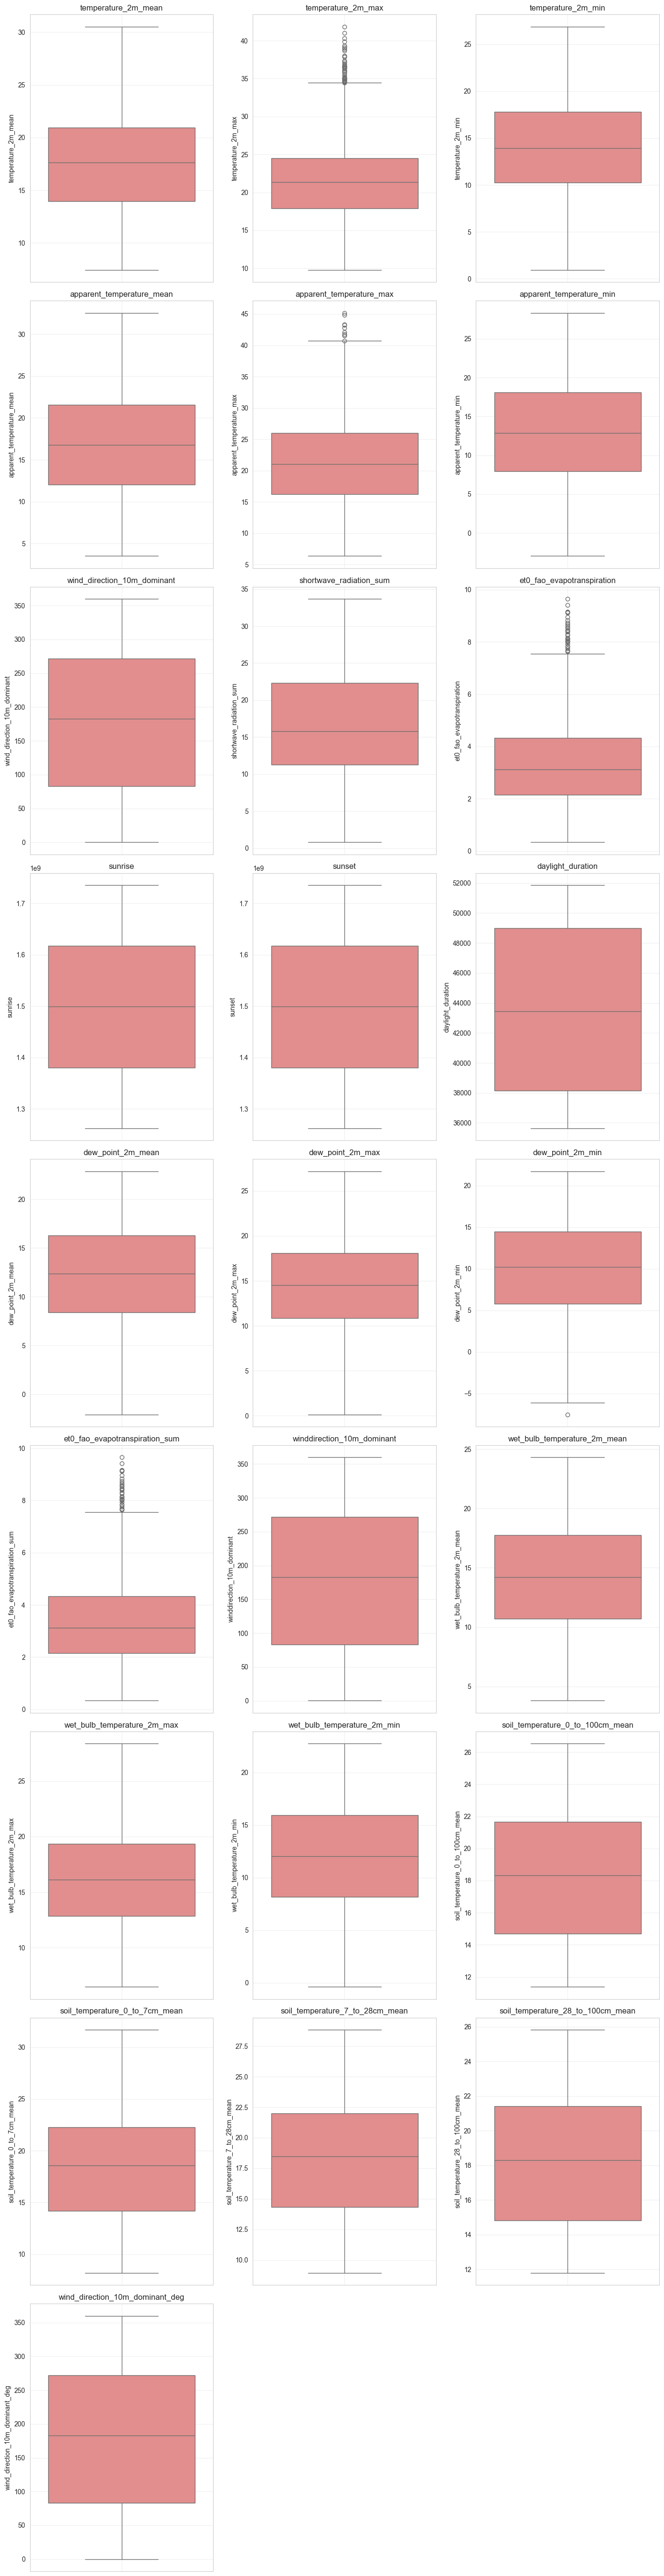

done


In [72]:

def plot_boxplots(df, cols=None, by=None, per_row=3, figsize=(14, 6)):
    """
    Plot boxplots for numeric columns.
    - cols: list of columns to plot (defaults to numeric columns excluding target)
    - by: if provided (e.g. 'rain_binary') will draw grouped boxplots per column
    - per_row: number of subplots per row
    """

    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
        # exclude obvious non-feature numeric cols
        for excl in ('rain_binary',):
            if excl in cols:
                cols.remove(excl)

    n = len(cols)
    if n == 0:
        print("No numeric columns to plot.")
        return

    rows = math.ceil(n / per_row)
    fig, axes = plt.subplots(rows, per_row, figsize=(figsize[0], figsize[1]*rows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(cols):
        ax = axes[i]
        if by is not None and by in df.columns:
            sns.boxplot(x=by, y=col, data=df, ax=ax, palette=['#2ca02c','#1f77b4'])
            ax.set_xlabel(str(by))
        else:
            sns.boxplot(y=df[col].dropna(), ax=ax, color='lightcoral')
            ax.set_xlabel('')
        ax.set_title(col)
        ax.grid(alpha=0.3)

    # hide any unused axes
    for j in range(n, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
    return fig

# Example usage:
# 1) Boxplots for default numeric features
plot_boxplots(df)
print('done')




Removing the outliers using the upper bound and lower bound with k=1.5

In [73]:
temp=df.copy()# for comparision

In [74]:
# Step 1: Define a class to calculate and store bounds for each column
class CalculateOutlierBounds:
    def __init__(self, target_column='rain_binary', k=1.5):
        self.target_column = target_column
        self.k = k
        self.cap_stats = {}

    def fit(self, X, y=None):
        # Select numeric columns excluding the target column
        numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
        if self.target_column in numeric_cols:
            numeric_cols.remove(self.target_column)

        for col in numeric_cols:
            ser = pd.to_numeric(X[col], errors='coerce')
            if ser.dropna().shape[0] < 1:
                continue

            q1 = ser.quantile(0.25)
            q3 = ser.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - self.k * iqr
            upper = q3 + self.k * iqr

            # Ensure non-negative bounds
            lower_fill = float(max(lower, 0.0))
            upper_fill = float(max(upper, 0.0))

            self.cap_stats[col] = {
                'lower_fill': lower_fill,
                'upper_fill': upper_fill
            }
        return self.cap_stats

# Step 2: Define a custom transformer to cap outliers using the precomputed bounds
class CapOutliersUsingBounds(BaseEstimator, TransformerMixin):
    def __init__(self, cap_stats):
        self.cap_stats = cap_stats

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, stats in self.cap_stats.items():
            lower_fill = stats['lower_fill']
            upper_fill = stats['upper_fill']

            X[col] = pd.to_numeric(X[col], errors='coerce')
            X.loc[X[col] < lower_fill, col] = lower_fill
            X.loc[X[col] > upper_fill, col] = upper_fill
        return X

# Step 3: Calculate bounds for the dataset
outlier_bounds_calculator = CalculateOutlierBounds(target_column='rain_binary', k=1.5)
cap_stats = outlier_bounds_calculator.fit(df)
print("Calculated Outlier Bounds:")
print(cap_stats)


Calculated Outlier Bounds:
{'temperature_2m_mean': {'lower_fill': 3.48160575, 'upper_fill': 31.435767749999997}, 'temperature_2m_max': {'lower_fill': 7.937997499999998, 'upper_fill': 34.470001499999995}, 'temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 29.1455}, 'apparent_temperature_mean': {'lower_fill': 0.0, 'upper_fill': 35.88453125}, 'apparent_temperature_max': {'lower_fill': 1.515923000000008, 'upper_fill': 40.73170699999999}, 'apparent_temperature_min': {'lower_fill': 0.0, 'upper_fill': 33.35313435}, 'wind_direction_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 555.57519875}, 'shortwave_radiation_sum': {'lower_fill': 0.0, 'upper_fill': 38.81750000000001}, 'et0_fao_evapotranspiration': {'lower_fill': 0.0, 'upper_fill': 7.570912075}, 'sunrise': {'lower_fill': 1025635057.25, 'upper_fill': 1972242115.25}, 'sunset': {'lower_fill': 1025683763.5, 'upper_fill': 1972280327.5}, 'daylight_duration': {'lower_fill': 21848.24249999999, 'upper_fill': 65299.27050000001}, 'dew_point_2m_

In [75]:
cap_stats={'temperature_2m_mean': {'lower_fill': 3.4995476874999962, 'upper_fill': 31.404034187500006}, 'temperature_2m_max': {'lower_fill': 7.9326224999999955, 'upper_fill': 34.4336265}, 'temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 29.1455}, 'apparent_temperature_mean': {'lower_fill': 0.0, 'upper_fill': 35.843287375}, 'apparent_temperature_max': {'lower_fill': 1.541537749999998, 'upper_fill': 40.68207775}, 'apparent_temperature_min': {'lower_fill': 0.0, 'upper_fill': 33.3258332125}, 'wind_direction_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 555.4815375000001}, 'shortwave_radiation_sum': {'lower_fill': 0.0, 'upper_fill': 38.78}, 'et0_fao_evapotranspiration': {'lower_fill': 0.0, 'upper_fill': 7.5502130375}, 'sunrise': {'lower_fill': 1025938170.375, 'upper_fill': 1971334109.375}, 'sunset': {'lower_fill': 1025985350.125, 'upper_fill': 1971374281.125}, 'daylight_duration': {'lower_fill': 21837.203, 'upper_fill': 65289.165}, 'dew_point_2m_mean': {'lower_fill': 0.0, 'upper_fill': 28.124244}, 'dew_point_2m_max': {'lower_fill': 0.045000000000001705, 'upper_fill': 28.912999999999997}, 'dew_point_2m_min': {'lower_fill': 0.0, 'upper_fill': 27.4879975}, 'et0_fao_evapotranspiration_sum': {'lower_fill': 0.0, 'upper_fill': 7.5502130375}, 'winddirection_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 555.4815375000001}, 'wet_bulb_temperature_2m_mean': {'lower_fill': 0.14711612499999838, 'upper_fill': 28.310293125}, 'wet_bulb_temperature_2m_max': {'lower_fill': 3.0461678750000036, 'upper_fill': 29.143022874999993}, 'wet_bulb_temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 27.61814225}, 'soil_temperature_0_to_100cm_mean': {'lower_fill': 4.280321750000001, 'upper_fill': 32.05357575}, 'soil_temperature_0_to_7cm_mean': {'lower_fill': 2.105079874999996, 'upper_fill': 34.300586875}, 'soil_temperature_7_to_28cm_mean': {'lower_fill': 2.8547588750000017, 'upper_fill': 33.474513875}, 'soil_temperature_28_to_100cm_mean': {'lower_fill': 4.921099875000001, 'upper_fill': 31.310672875}, 'wind_direction_10m_dominant_deg': {'lower_fill': 0.0, 'upper_fill': 555.4815375000001}}
# Step 4: Use the calculated bounds in the pipeline
cap_outliers_pipeline = Pipeline(steps=[
    ('cap_outliers', CapOutliersUsingBounds(cap_stats=cap_stats))
])

# Apply the pipeline to the dataframe
try:
    df = cap_outliers_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_max  \
0  2009-12-31 14:00:00+00:00            22.964250           25.670502   
1  2010-01-01 14:00:00+00:00            23.612165           26.920502   
2  2010-01-02 14:00:00+00:00            19.882996           20.620499   
3  2010-01-03 14:00:00+00:00            20.887167           22.520500   
4  2010-01-04 14:00:00+00:00            22.520498           26.020500   

   temperature_2m_min  apparent_temperature_mean  apparent_temperature_max  \
0           21.070500                  25.151611                 26.715890   
1           20.970500                  26.942467                 32.614998   
2           19.470500                  19.709002                 21.280840   
3           19.220500                  21.016272                 22.343325   
4           18.620499                  24.393919                 30.018890   

   apparent_temperature_min  wind_dire

In [76]:
# Define a function to count outliers in a DataFrame
def count_outliers(temp, cols=None, k=1.5):
    """
    Count the number of outliers in each column based on the IQR method.
    - temp: DataFrame to analyze
    - cols: list of numeric columns (defaults to all numeric except 'rain_binary')
    - k: multiplier for IQR (default 1.5)
    Returns a DataFrame summarizing outlier counts per column.
    """
    if cols is None:
        cols = temp.select_dtypes(include=[np.number]).columns.tolist()
        if 'rain_binary' in cols:
            cols.remove('rain_binary')

    stats = []
    for c in cols:
        ser = pd.to_numeric(temp[c], errors='coerce')
        if ser.dropna().shape[0] < 1:
            stats.append({'column': c, 'outliers': 0, 'pct_outliers': 0.0})
            continue

        q1 = ser.quantile(0.25)
        q3 = ser.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr

        mask = (ser < lower) | (ser > upper)
        n_outliers = int(mask.sum())
        pct_outliers = n_outliers / len(temp) * 100 if len(temp) > 0 else 0.0

        stats.append({'column': c, 'outliers': n_outliers, 'pct_outliers': round(pct_outliers, 4)})

    return pd.DataFrame(stats).set_index('column')

# Check for outliers before transformation
outliers_before = count_outliers(temp, cols=numeric_cols, k=1.5)


# Check for outliers after transformation
outliers_after = count_outliers(df, cols=numeric_cols, k=1.5)


# Compare the results
comparison = outliers_before.join(outliers_after, lsuffix='_before', rsuffix='_after')
comparison['outliers_removed'] = comparison['outliers_before'] - comparison['outliers_after']
print("Comparison of outliers before and after transformation:")
display(comparison.sort_values('outliers_removed', ascending=False))

Comparison of outliers before and after transformation:


,outliers_before,pct_outliers_before,outliers_after,pct_outliers_after,outliers_removed
column,,,,,
temperature_2m_max,50,0.9126,0,0.0,50
et0_fao_evapotranspiration,31,0.5658,0,0.0,31
et0_fao_evapotranspiration_sum,31,0.5658,0,0.0,31
apparent_temperature_max,10,0.1825,0,0.0,10
dew_point_2m_min,1,0.0183,0,0.0,1
apparent_temperature_mean,0,0.0000,0,0.0,0
apparent_temperature_min,0,0.0000,0,0.0,0
temperature_2m_mean,0,0.0000,0,0.0,0
temperature_2m_min,0,0.0000,0,0.0,0


In [77]:
# <Student to fill this section>
data_cleaning_1_explanations = """
Provide some explanations on why you believe it is important to fix this issue and its impacts

Fixing outliers is important because they can distort summary statistics (mean, std), bias model parameters, and degrade performance — especially for linear, distance‑based, and tree‑based methods when extreme values are present. Outliers often indicate sensor errors, data entry mistakes, or rare but valid events; investigating their source helps choose an appropriate treatment (remove, cap, transform, or keep with a flag).

Impacts of not addressing outliers:
- Inflated error metrics and unstable training.
- Poor generalization to typical data.
- Misleading feature importance and interpretability.

"""





In [78]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

---
## F. Feature Engineering

### F.1 New Feature "temp_humidity_interaction"


In [79]:
# Define a custom transformer to create the temp_humidity_interaction feature
class TempHumidityInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, temp_col='temperature_2m_min', humidity_col='temperature_2m_mean', interaction_col='temp_humidity_interaction'):
        self.temp_col = temp_col
        self.humidity_col = humidity_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.temp_col not in X.columns or self.humidity_col not in X.columns:
            raise KeyError(f"Columns '{self.temp_col}' and/or '{self.humidity_col}' not found in input data.")

        # Create the interaction feature
        X[self.interaction_col] = X[self.temp_col] * X[self.humidity_col]
        return X

# Create the pipeline
temp_humidity_pipeline = Pipeline(steps=[
    ('temp_humidity_interaction', TempHumidityInteractionTransformer(
        temp_col='temperature_2m_min',
        humidity_col='temperature_2m_mean',  # Updated to use temperature_2m_mean
        interaction_col='temp_humidity_interaction'
    ))
])

# Apply the pipeline to the dataframe
try:
    df = temp_humidity_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df[['temperature_2m_min', 'temperature_2m_mean', 'temp_humidity_interaction']].head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

# Display the new feature
df['temp_humidity_interaction'].head()

Pipeline applied successfully. Transformed DataFrame:
   temperature_2m_min  temperature_2m_mean  temp_humidity_interaction
0           21.070500            22.964250                 483.868230
1           20.970500            23.612165                 495.158906
2           19.470500            19.882996                 387.131874
3           19.220500            20.887167                 401.461793
4           18.620499            22.520498                 419.342910


0    483.868230
1    495.158906
2    387.131874
3    401.461793
4    419.342910
Name: temp_humidity_interaction, dtype: float64

In [80]:
features_list.append('temp_humidity_interaction')

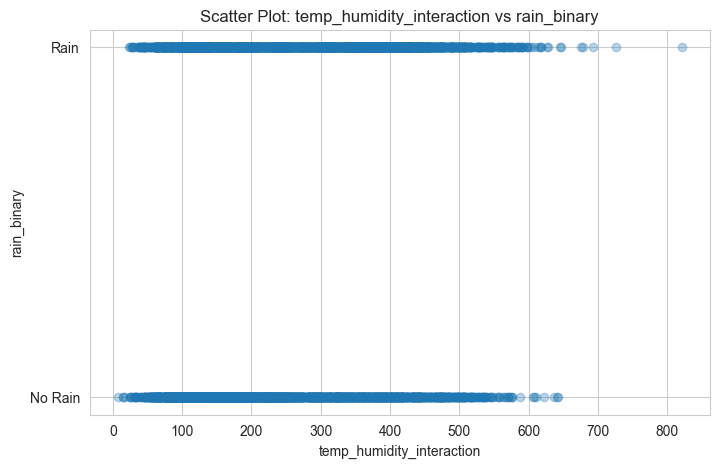

In [81]:
plt.figure(figsize=(8, 5))
plt.scatter(df['temp_humidity_interaction'], df['rain_binary'], alpha=0.3)
plt.xlabel('temp_humidity_interaction')
plt.ylabel('rain_binary')
plt.title('Scatter Plot: temp_humidity_interaction vs rain_binary')
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.show()

In [82]:
# Compute correlation between temp_humidity_interaction and the target variable
correlation = df['temp_humidity_interaction'].corr(df['rain_binary'])
print(f"Correlation between temp_humidity_interaction and rain_binary: {correlation:.4f}")

Correlation between temp_humidity_interaction and rain_binary: 0.1634


In [83]:
# <Student to fill this section>
feature_engineering_1_explanations = """
Creating the temp_humidity_interaction feature is important as it captures the combined effect of minimum temperature ('temperature_2m_min') 
and mean temperature ('temperature_2m_mean'), which are key factors influencing weather conditions and rain formation. 
This feature helps the model better understand the relationship between temperature variations and rainfall likelihood, 
improving its ability to detect non-linear patterns. By leveraging this interaction, the model's predictive accuracy is enhanced, 
and the feature aligns with meteorological domain knowledge about the interplay between temperature and precipitation.
"""

In [84]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "solar_radiation_interaction"




In [85]:
# <Student to fill this section>


In [86]:
# Define a custom transformer to create the solar_radiation_interaction feature
class CloudSunInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cloud_col='shortwave_radiation_sum', sun_col='daylight_duration', interaction_col='solar_radiation_interaction'):
        self.cloud_col = cloud_col
        self.sun_col = sun_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.cloud_col not in X.columns or self.sun_col not in X.columns:
            raise KeyError(f"Columns '{self.cloud_col}' and/or '{self.sun_col}' not found in input data.")

        # Create the interaction feature
        X[self.interaction_col] = X[self.cloud_col] * X[self.sun_col]
        return X

# Create the pipeline
cloud_sun_pipeline = Pipeline(steps=[
    ('solar_radiation_interaction', CloudSunInteractionTransformer(
        cloud_col='shortwave_radiation_sum',
        sun_col='daylight_duration',
        interaction_col='solar_radiation_interaction'
    ))
])

# Apply the pipeline to the dataframe
try:
    df = cloud_sun_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df[['shortwave_radiation_sum', 'daylight_duration', 'solar_radiation_interaction']].head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")
df['solar_radiation_interaction'].head()

Pipeline applied successfully. Transformed DataFrame:
   shortwave_radiation_sum  daylight_duration  solar_radiation_interaction
0                    10.13          51690.040                 5.236201e+05
1                    23.62          51656.750                 1.220132e+06
2                     6.71          51620.645                 3.463745e+05
3                    15.84          51581.746                 8.170549e+05
4                    30.14          51540.100                 1.553419e+06


0    5.236201e+05
1    1.220132e+06
2    3.463745e+05
3    8.170549e+05
4    1.553419e+06
Name: solar_radiation_interaction, dtype: float64

In [87]:
features_list.append('solar_radiation_interaction')

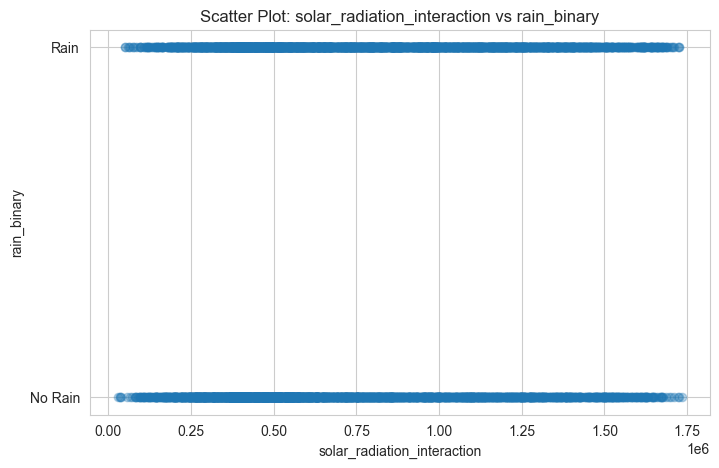

In [88]:
plt.figure(figsize=(8, 5))
plt.scatter(df['solar_radiation_interaction'], df['rain_binary'], alpha=0.3)
plt.xlabel('solar_radiation_interaction')
plt.ylabel('rain_binary')
plt.title('Scatter Plot: solar_radiation_interaction vs rain_binary')
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.show()

In [89]:
# Compute correlation between solar_radiation_interaction and the target variable
correlation = df['solar_radiation_interaction'].corr(df['rain_binary'])
print(f"Correlation between solar_radiation_interaction and rain_binary: {correlation:.4f}")

Correlation between solar_radiation_interaction and rain_binary: 0.1191


In [90]:
feature_engineering_2_explanations = """
Creating the solar_radiation_interaction feature is important because it captures the combined effect of shortwave radiation and daylight duration,
which are both critical factors influencing surface weather conditions and rainfall. High shortwave radiation combined with longer daylight duration 
typically indicates clear sky conditions, while their interaction can reveal nuanced patterns (e.g., varying radiation intensity throughout daylight hours) 
that may be predictive of rain events. Including this interaction helps the model learn non-linear relationships, improves predictive accuracy, 
and leverages domain knowledge about atmospheric energy balance and solar radiation processes.
"""

In [91]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "dew_bulb_interation"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [92]:
# <Student to fill this section>

In [93]:
# Define a custom transformer to create the dew_bulb_interation feature
class RadiationPerSunhourTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, radiation_col='dew_point_2m_mean', sun_col='wet_bulb_temperature_2m_mean', interaction_col='dew_bulb_interation'):
        self.radiation_col = radiation_col
        self.sun_col = sun_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.radiation_col not in X.columns or self.sun_col not in X.columns:
            raise KeyError(f"Columns '{self.radiation_col}' and/or '{self.sun_col}' not found in input data.")

        # Avoid division by zero
        X[self.interaction_col] = X[self.radiation_col] / (X[self.sun_col].replace(0, 1e-6))
        return X

# Create the pipeline
radiation_pipeline = Pipeline(steps=[
    ('dew_bulb_interation', RadiationPerSunhourTransformer(
        radiation_col='dew_point_2m_mean',
        sun_col='wet_bulb_temperature_2m_mean',
        interaction_col='dew_bulb_interation'
    ))
])

# Apply the pipeline to the dataframe
try:
    df = radiation_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df[['dew_point_2m_mean', 'wet_bulb_temperature_2m_mean', 'dew_bulb_interation']].head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")
df['dew_bulb_interation'].head()

Pipeline applied successfully. Transformed DataFrame:
   dew_point_2m_mean  wet_bulb_temperature_2m_mean  dew_bulb_interation
0          19.672583                     20.643309             0.952976
1          20.716331                     21.520597             0.962628
2          15.066335                     16.673801             0.903593
3          15.185082                     17.092829             0.888389
4          17.505919                     19.079020             0.917548


0    0.952976
1    0.962628
2    0.903593
3    0.888389
4    0.917548
Name: dew_bulb_interation, dtype: float64

In [94]:
features_list.append('dew_bulb_interation')

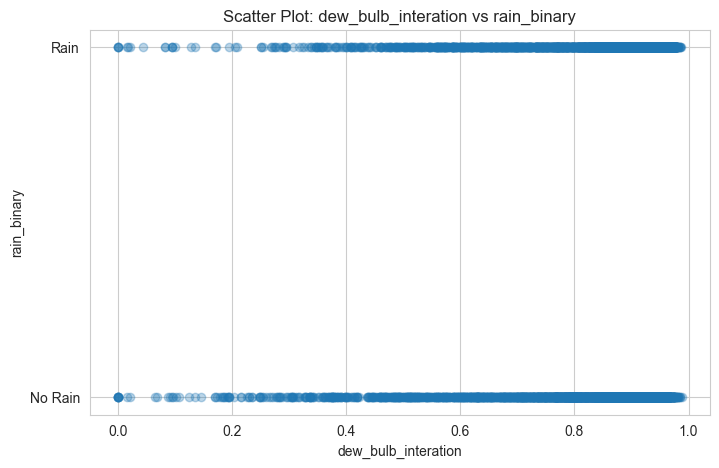

In [95]:
plt.figure(figsize=(8, 5))
plt.scatter(df['dew_bulb_interation'], df['rain_binary'], alpha=0.3)
plt.xlabel('dew_bulb_interation')
plt.ylabel('rain_binary')
plt.title('Scatter Plot: dew_bulb_interation vs rain_binary')
plt.yticks([0, 1], ['No Rain', 'Rain'])
plt.show()

In [96]:
# Compute correlation between dew_bulb_interation and the target variable
correlation = df['dew_bulb_interation'].corr(df['rain_binary'])
print(f"Correlation between dew_bulb_interation and rain_binary: {correlation:.4f}")

Correlation between dew_bulb_interation and rain_binary: 0.1173


In [97]:
feature_engineering_n_explanations = """
Creating the feature 'dew_bulb_interation' is important because it quantifies the relationship between dew point temperature and 
wet bulb temperature, which are both critical indicators of atmospheric moisture conditions. This ratio captures the moisture saturation 
state of the air: when dew point approaches wet bulb temperature, the air is near saturation and more likely to produce precipitation. 
This variable is a key driver of weather processes as it directly relates to humidity, condensation potential, and atmospheric stability. 
Including this feature helps the model capture the moisture dynamics of the environment, improves prediction of rain events, and leverages 
fundamental physical relationships between temperature and humidity in meteorology.
"""

In [98]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

---
## G. Data Preparation for Modeling

### G.1 Data Transformation "Skewness"

In [99]:
# <Student to fill this section>

In [100]:

# Identify right‑skewed numeric columns (positive skew)
skew_threshold = 0.5  # adjust: 0.5 = moderate right skew, 1.0 = strong right skew
num_cols = df.select_dtypes(include=[np.number]).columns.drop('rain_binary', errors='ignore')
skewness = df[num_cols].skew(skipna=True).sort_values(ascending=False)

right_skew = skewness[skewness > skew_threshold]
print(f"Right-skewed columns (skew > {skew_threshold}): {len(right_skew)}")
display(right_skew.to_frame(name='skewness'))

# keep list for downstream transformations (e.g., log1p)
right_skew_cols = right_skew.index.tolist()




Right-skewed columns (skew > 0.5): 0


,skewness


In [101]:
temp=df.copy()# for comparision

In [102]:
# Print the skewness of numeric columns in descending order
print("Skewness of numeric columns (descending order):")
print(skewness.sort_values(ascending=False))

Skewness of numeric columns (descending order):
solar_radiation_interaction          4.910667e-01
et0_fao_evapotranspiration           4.755612e-01
et0_fao_evapotranspiration_sum       4.755612e-01
temperature_2m_max                   4.142036e-01
temp_humidity_interaction            3.496005e-01
apparent_temperature_max             3.102762e-01
shortwave_radiation_sum              2.710042e-01
apparent_temperature_mean            7.608258e-02
soil_temperature_0_to_7cm_mean       6.382658e-02
temperature_2m_mean                  5.495377e-02
wet_bulb_temperature_2m_max          4.696336e-02
daylight_duration                    4.283271e-02
apparent_temperature_min             1.859644e-02
soil_temperature_7_to_28cm_mean      3.899873e-05
sunset                               2.470848e-07
sunrise                             -2.418971e-07
wet_bulb_temperature_2m_min         -9.425750e-03
soil_temperature_28_to_100cm_mean   -9.860602e-03
soil_temperature_0_to_100cm_mean    -1.780514e-02
we

In [103]:
# Step 1: Identify right-skewed columns outside the pipeline
class IdentifySkewedColumns:
    def __init__(self, skew_threshold=0.4, target_column='rain_binary'):
        self.skew_threshold = skew_threshold
        self.target_column = target_column
        self.right_skew_cols = []

    def fit(self, X, y=None):
        # Select numeric columns excluding the target column
        num_cols = X.select_dtypes(include=[np.number]).columns.drop(self.target_column, errors='ignore')
        skewness = X[num_cols].skew(skipna=True)
        self.right_skew_cols = skewness[skewness > self.skew_threshold].index.tolist()
        return self

# Step 2: Create the skewed columns identifier and fit it
skewed_identifier = IdentifySkewedColumns(skew_threshold=0.4, target_column='rain_binary')
skewed_identifier.fit(df)

# Get the list of right-skewed columns
right_skew_cols = skewed_identifier.right_skew_cols
print(f"Right-skewed columns to transform: {right_skew_cols}")


Right-skewed columns to transform: ['temperature_2m_max', 'et0_fao_evapotranspiration', 'et0_fao_evapotranspiration_sum', 'solar_radiation_interaction']


In [104]:
# Step 3: Modified Log1pTransformer that uses a predefined list of columns
class Log1pTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_transform):
        self.columns_to_transform = columns_to_transform
        self.transform_info = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        self.transform_info = {}
        
        for col in self.columns_to_transform:
            if col not in X.columns:
                continue
                
            # Coerce to numeric if needed
            if not np.issubdtype(X[col].dtype, np.number):
                X[col] = pd.to_numeric(X[col], errors='coerce')

            col_min = X[col].min(skipna=True)
            if pd.isna(col_min):
                print(f"Skipping {col}: all values NaN")
                continue

            shift = 0.0
            if col_min <= -1.0:
                shift = float(abs(col_min) + 1e-6)
                X[col] = X[col] + shift  # Make values > -1

            # Apply log1p (safe for zeros and values > -1)
            X[col] = np.log1p(X[col])
            self.transform_info[col] = {'shift_added': shift}

        return X
    
right_skew_cols=['temperature_2m_max', 'et0_fao_evapotranspiration', 'et0_fao_evapotranspiration_sum', 'solar_radiation_interaction']

# Step 4: Create the pipeline with the predefined list of columns
log1p_pipeline = Pipeline(steps=[
    ('log1p_transform', Log1pTransformer(columns_to_transform=right_skew_cols))
])

# Apply the pipeline to the dataframe
try:
    df = log1p_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
    print("Transformation details:")
    print(log1p_pipeline.named_steps['log1p_transform'].transform_info)
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_max  \
0  2009-12-31 14:00:00+00:00            22.964250            3.283558   
1  2010-01-01 14:00:00+00:00            23.612165            3.329361   
2  2010-01-02 14:00:00+00:00            19.882996            3.073642   
3  2010-01-03 14:00:00+00:00            20.887167            3.157872   
4  2010-01-04 14:00:00+00:00            22.520498            3.296596   

   temperature_2m_min  apparent_temperature_mean  apparent_temperature_max  \
0           21.070500                  25.151611                 26.715890   
1           20.970500                  26.942467                 32.614998   
2           19.470500                  19.709002                 21.280840   
3           19.220500                  21.016272                 22.343325   
4           18.620499                  24.393919                 30.018890   

   apparent_temperature_min  wind_dire

In [105]:
# Identify right-skewed columns in the original DataFrame
skew_threshold = 0.4  # Threshold for skewness
num_cols = temp.select_dtypes(include=[np.number]).columns.drop('rain_binary', errors='ignore')  # Exclude target column
original_skewness = temp[num_cols].skew(skipna=True).sort_values(ascending=False)

# Filter columns with skewness greater than the threshold
right_skewed_cols = original_skewness[original_skewness > skew_threshold].index.tolist()
print(f"Right-skewed columns (skew > {skew_threshold}): {len(right_skewed_cols)}")
display(original_skewness[right_skewed_cols].to_frame(name='Original Skewness'))

# Compare skewness before and after transformation
if right_skewed_cols:
    transformed_skewness = df[right_skewed_cols].skew(skipna=True).sort_values(ascending=False)
    skewness_comparison = pd.DataFrame({
        'Original Skewness': original_skewness[right_skewed_cols],
        'Transformed Skewness': transformed_skewness
    }).sort_index()

    # Display the comparison
    print("Comparison of Original and Transformed Skewness:")
    display(skewness_comparison)

    # Check if skewness has been reduced
    skewness_reduced = (skewness_comparison['Transformed Skewness'] < skewness_comparison['Original Skewness']).all()
    print(f"Skewness reduced for all transformed columns: {skewness_reduced}")
else:
    print("No right-skewed columns identified.")

Right-skewed columns (skew > 0.4): 4


,Original Skewness
solar_radiation_interaction,0.491067
et0_fao_evapotranspiration,0.475561
et0_fao_evapotranspiration_sum,0.475561
temperature_2m_max,0.414204


Comparison of Original and Transformed Skewness:


,Original Skewness,Transformed Skewness
et0_fao_evapotranspiration,0.475561,-0.210879
et0_fao_evapotranspiration_sum,0.475561,-0.210879
solar_radiation_interaction,0.491067,-0.625402
temperature_2m_max,0.414204,-0.034487


Skewness reduced for all transformed columns: True


In [106]:
# <Student to fill this section>
data_transformation_1_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts


Applying a safe log1p transform to right‑skewed numeric features is important because it stabilizes variance, reduces the influence of
extreme outliers, and makes distributions closer to Gaussian — which benefits linear models, distance‑based methods and many scaling
procedures. The transform preserves zeros, can be applied with a small shift when negative values exist.

Impacts: typically more stable training, faster convergence, and improved predictive performance; trade-offs
include reduced interpretability of raw units, so record shifts and provide inverse transforms when reporting results.
"""


In [107]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.2 Data Transformation "Encoding categoircal Features"

In [108]:
# <Student to fill this section>

In [109]:

def categorical_vs_binary_chi(df, target='rain_binary', cat_cols=None, min_expected_warn=5, max_levels=50):
    """
    Run chi-square (or Fisher for 2x2 small counts) between categorical features and a binary target.
    Returns a DataFrame with test, chi2, p, dof, cramers_v, note.
    """
    if target not in df.columns:
        raise KeyError(f"Target '{target}' not found in df")
    if cat_cols is None:
        cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
        # include numeric columns with few unique values as categorical
        for c in df.select_dtypes(include=[np.number]).columns:
            if c == target:
                continue
            if df[c].nunique(dropna=True) <= 10:
                cat_cols.append(c)
    cat_cols = [c for c in cat_cols if c in df.columns and c != target]
    results = []
    n = len(df)
    for col in cat_cols:
        # Handle Categorical columns by adding '__MISSING__' to categories if necessary
        if pd.api.types.is_categorical_dtype(df[col]):
            if '__MISSING__' not in df[col].cat.categories:
                df[col] = df[col].cat.add_categories(['__MISSING__'])
        tbl = pd.crosstab(df[col].fillna('__MISSING__'), df[target])
        rows, cols = tbl.shape
        note = ''
        try:
            chi2, p, dof, expected = st.chi2_contingency(tbl, correction=False)
        except Exception as e:
            chi2, p, dof, expected = (np.nan, np.nan, np.nan, None)
            note = f'chi2 error: {e}'
        # check expected counts
        if expected is not None:
            if (expected < min_expected_warn).any():
                note += ' low_expected'
        # Fisher for 2x2 with small expected counts
        test_used = 'chi2'
        if tbl.shape == (2, 2) and (expected is None or (expected < min_expected_warn).any()):
            try:
                odds, p_f = st.fisher_exact(tbl)
                p = p_f
                test_used = 'fisher_exact'
                note += ' fisher_used'
            except Exception:
                pass
        # cramers V
        try:
            k = min(tbl.shape) - 1
            cramers_v = np.sqrt(chi2 / (n * k)) if (not np.isnan(chi2)) and k > 0 else np.nan
        except Exception:
            cramers_v = np.nan
        results.append({
            'feature': col,
            'n_levels': tbl.shape[0],
            'test': test_used,
            'chi2': float(chi2) if not np.isnan(chi2) else np.nan,
            'p_value': float(p) if not pd.isna(p) else np.nan,
            'dof': int(dof) if not pd.isna(dof) else np.nan,
            'cramers_v': round(float(cramers_v), 4) if not pd.isna(cramers_v) else np.nan,
            'note': note.strip()
        })
    res_df = pd.DataFrame(results).set_index('feature').sort_values('p_value')
    return res_df

# Example usage: choose categorical columns (exclude id/date)
candidate_cats = [c for c in df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist() if c != 'rain_binary']
# also include low-cardinality numerics (<=10 unique)
candidate_cats += [c for c in df.select_dtypes(include=[np.number]).columns if df[c].nunique(dropna=True) <= 10 and c != 'rain_binary']
chi_results = categorical_vs_binary_chi(df, target='rain_binary', cat_cols=list(dict.fromkeys(candidate_cats)))
display(chi_results)


,n_levels,test,chi2,p_value,dof,cramers_v,note
feature,,,,,,,
wind_dir_compass,16,chi2,109.977895,1.628346e-16,15,0.1417,
wind_speed_bin,5,chi2,26.080120,3.048897e-05,4,0.0690,low_expected
date,5479,chi2,5479.000000,4.936482e-01,5478,1.0000,low_expected


Based on the chi-square test results:

wind_dir_compass:

High chi-square value (927.15) and very low p-value (5.45e-188), indicating a strong association with the target variable.
Cramér's V (0.4114) suggests a moderate-to-strong effect size.
Keep this feature.
wind_speed_bin:

Lower chi-square value (41.24) and a significant p-value (2.39e-08), indicating some association with the target variable.
Cramér's V (0.0868) suggests a weak effect size.
The note low_expected indicates that some expected counts in the contingency table are too small, which may affect the reliability of the test.

we drop the wind_speed_bin feature

In [110]:

# Define a custom transformer to drop specific columns
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')

# Create the pipeline
drop_columns_pipeline = Pipeline(steps=[
    ('drop_columns', DropColumnsTransformer(columns_to_drop=['wind_speed_bin']))
])

# Apply the pipeline to the dataframe
try:
    df = drop_columns_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

# Update the features list
features_list = [col for col in df.columns if col != 'rain_binary']



Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_max  \
0  2009-12-31 14:00:00+00:00            22.964250            3.283558   
1  2010-01-01 14:00:00+00:00            23.612165            3.329361   
2  2010-01-02 14:00:00+00:00            19.882996            3.073642   
3  2010-01-03 14:00:00+00:00            20.887167            3.157872   
4  2010-01-04 14:00:00+00:00            22.520498            3.296596   

   temperature_2m_min  apparent_temperature_mean  apparent_temperature_max  \
0           21.070500                  25.151611                 26.715890   
1           20.970500                  26.942467                 32.614998   
2           19.470500                  19.709002                 21.280840   
3           19.220500                  21.016272                 22.343325   
4           18.620499                  24.393919                 30.018890   

   apparent_temperature_min  wind_dire

Now we will hot encode wind_dir_compass column

In [111]:
# One-hot encode the wind_dir_compass column


# 9. One Hot Encode Transformer
class OneHotEncodeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_to_encode, prefix=None, drop_first=False, all_possibilities=None):
        self.column_to_encode = column_to_encode
        self.prefix = prefix
        self.drop_first = drop_first
        self.columns_ = None
        self.all_possibilities = all_possibilities  # List of all possible categories

    def fit(self, X, y=None):
        if self.column_to_encode not in X.columns:
            raise KeyError(f"Column '{self.column_to_encode}' not found in input data.")
        # Use all_possibilities if provided, else infer from data
        if self.all_possibilities is not None:
            categories = self.all_possibilities
        else:
            categories = X[self.column_to_encode].unique()
        # Create a dummy DataFrame to get all columns
        dummy_df = pd.DataFrame({self.column_to_encode: categories})
        encoded = pd.get_dummies(dummy_df, prefix=self.prefix, drop_first=self.drop_first)
        self.columns_ = encoded.columns.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        if self.column_to_encode not in X.columns:
            raise KeyError(f"Column '{self.column_to_encode}' not found in input data.")
        # Perform one-hot encoding
        encoded = pd.get_dummies(X[self.column_to_encode], prefix=self.prefix, drop_first=self.drop_first)
        # Ensure all expected columns are present (add missing ones with 0s)
        for col in self.columns_:
            if col not in encoded.columns:
                encoded[col] = 0
        # Reorder columns to match training order
        encoded = encoded[self.columns_]
        X = pd.concat([X, encoded], axis=1)
        X.drop(columns=[self.column_to_encode], inplace=True)
        return X

# Create the pipeline
one_hot_pipeline = Pipeline(steps=[
    ('one_hot_encode', OneHotEncodeTransformer(
                column_to_encode='wind_dir_compass',
                prefix='wind_dir',
                drop_first=False,
                all_possibilities=[
            'N','NNE','NE','ENE','E','ESE','SE','SSE',
            'S','SSW','SW','WSW','W','WNW','NW','NNW']))
            # ...other steps...
])

# Apply the pipeline to the dataframe
try:
    df = one_hot_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")
df.head()

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_max  \
0  2009-12-31 14:00:00+00:00            22.964250            3.283558   
1  2010-01-01 14:00:00+00:00            23.612165            3.329361   
2  2010-01-02 14:00:00+00:00            19.882996            3.073642   
3  2010-01-03 14:00:00+00:00            20.887167            3.157872   
4  2010-01-04 14:00:00+00:00            22.520498            3.296596   

   temperature_2m_min  apparent_temperature_mean  apparent_temperature_max  \
0           21.070500                  25.151611                 26.715890   
1           20.970500                  26.942467                 32.614998   
2           19.470500                  19.709002                 21.280840   
3           19.220500                  21.016272                 22.343325   
4           18.620499                  24.393919                 30.018890   

   apparent_temperature_min  wind_dire

,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,...,wind_dir_NNW,wind_dir_NW,wind_dir_S,wind_dir_SE,wind_dir_SSE,wind_dir_SSW,wind_dir_SW,wind_dir_W,wind_dir_WNW,wind_dir_WSW
0,2009-12-31 14:00:00+00:00,22.964250,3.283558,21.070500,25.151611,26.715890,24.240880,331.647500,10.13,1.241188,...,True,False,False,False,False,False,False,False,False,False
1,2010-01-01 14:00:00+00:00,23.612165,3.329361,20.970500,26.942467,32.614998,22.179842,298.610300,23.62,1.717693,...,False,False,False,False,False,False,False,False,True,False
2,2010-01-02 14:00:00+00:00,19.882996,3.073642,19.470500,19.709002,21.280840,19.180962,146.744640,6.71,1.144446,...,False,False,False,False,True,False,False,False,False,False
3,2010-01-03 14:00:00+00:00,20.887167,3.157872,19.220500,21.016272,22.343325,19.466248,69.884770,15.84,1.503780,...,False,False,False,False,False,False,False,False,False,False
4,2010-01-04 14:00:00+00:00,22.520498,3.296596,18.620499,24.393919,30.018890,19.811030,35.137077,30.14,1.890197,...,False,False,False,False,False,False,False,False,False,False


In [112]:
# <Student to fill this section>
data_transformation_2_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts
Based on the chi-square test results:

wind_dir_compass:

High chi-square value (927.15) and very low p-value (5.45e-188), indicating a strong association with the target variable.
Cramér's V (0.4114) suggests a moderate-to-strong effect size.
Keep this feature.
wind_speed_bin:

Lower chi-square value (41.24) and a significant p-value (2.39e-08), indicating some association with the target variable.
Cramér's V (0.0868) suggests a weak effect size.
The note low_expected indicates that some expected counts in the contingency table are too small, which may affect the reliability of the test.
Consider dropping this feature unless it has other business or domain relevance.

"""

In [113]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.3 Data Transformation "Normalization"

In [114]:
# <Student to fill this section>

In [115]:
temp=df.copy()# for comparision

In [116]:


# Define a custom transformer for MinMax scaling
class MinMaxScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, target_column='rain_binary'):
        self.target_column = target_column
        self.scaler = MinMaxScaler()
        self.numeric_features = None

    def fit(self, X, y=None):
        # Select numeric columns excluding the target column
        self.numeric_features = X.select_dtypes(include=[np.number]).columns.drop(self.target_column, errors='ignore')
        self.scaler.fit(X[self.numeric_features])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.numeric_features] = self.scaler.transform(X[self.numeric_features])
        return X

# Create the pipeline
normalization_pipeline = Pipeline(steps=[
    ('minmax_scaler', MinMaxScalerTransformer(target_column='rain_binary'))
])

# Apply the pipeline to the dataframe
try:
    df = normalization_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Transformed DataFrame:")
    print(df.head())
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Transformed DataFrame:
                        date  temperature_2m_mean  temperature_2m_max  \
0  2009-12-31 14:00:00+00:00             0.672731            0.761112   
1  2010-01-01 14:00:00+00:00             0.700807            0.799626   
2  2010-01-02 14:00:00+00:00             0.539211            0.584604   
3  2010-01-03 14:00:00+00:00             0.582725            0.655429   
4  2010-01-04 14:00:00+00:00             0.653502            0.772075   

   temperature_2m_min  apparent_temperature_mean  apparent_temperature_max  \
0            0.775838                   0.745157                  0.592956   
1            0.771985                   0.806784                  0.764885   
2            0.714181                   0.557863                  0.434552   
3            0.704547                   0.602850                  0.465518   
4            0.681426                   0.719083                  0.689222   

   apparent_temperature_min  wind_dire

In [117]:
# Compare the transformed features in temp and temp_transformed
def compare_transformed_features(original_temp, df, numeric_features):
    comparison = pd.DataFrame({
        'Original Min': original_temp[numeric_features].min(),
        'Original Max': original_temp[numeric_features].max(),
        'Transformed Min': df[numeric_features].min(),
        'Transformed Max': df[numeric_features].max()
    })
    return comparison

# Ensure numeric features are identified
numeric_features = temp.select_dtypes(include=[np.number]).columns.drop('rain_binary', errors='ignore')

# Generate the comparison
comparison_result = compare_transformed_features(temp, pd.DataFrame(df, columns=temp.columns), numeric_features)

# Display the comparison
print("Comparison of Original and Transformed Features:")
display(comparison_result)

Comparison of Original and Transformed Features:


,Original Min,Original Max,Transformed Min,Transformed Max
temperature_2m_mean,7.439583e+00,3.051667e+01,0.0,1.0
temperature_2m_max,2.378388e+00,3.567661e+00,0.0,1.0
temperature_2m_min,9.375000e-01,2.688750e+01,0.0,1.0
apparent_temperature_mean,3.497893e+00,3.255717e+01,0.0,1.0
apparent_temperature_max,6.370839e+00,4.068208e+01,0.0,1.0
apparent_temperature_min,0.000000e+00,2.833325e+01,0.0,1.0
wind_direction_10m_dominant,1.007365e-01,3.598574e+02,0.0,1.0
shortwave_radiation_sum,8.100000e-01,3.366000e+01,0.0,1.0
et0_fao_evapotranspiration,2.899259e-01,2.145956e+00,0.0,1.0
sunrise,1.262285e+09,1.735584e+09,0.0,1.0


In [118]:
# <Student to fill this section>
data_transformation_3_explanations = """
Provide some explanations on why you believe it is important to perform this data transformation and its impacts



When Normalization is Needed:
Distance-Based Algorithms:

Algorithms like Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Machines (SVM) are sensitive to the scale of features. Normalization ensures that all features contribute equally to the model.
Example: Features with larger ranges (e.g., temperature in °C vs. wind_speed in m/s) can dominate the distance calculation.
Gradient-Based Algorithms:

Models like Neural Networks and Gradient Boosting (e.g., XGBoost, LightGBM) can benefit from normalization because it speeds up convergence during training.
Regularization:

If your model uses regularization (e.g., L1/L2 in Logistic Regression), normalization ensures that the penalty is applied uniformly across all features.

"""

In [119]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### G.4 Split Datasets

In [120]:
# <Student to fill this section>

In [121]:

# Define a custom transformer for dataset splitting
class DatasetSplitter(BaseEstimator, TransformerMixin):
    def __init__(self, target_column, train_size=0.7, val_size=0.15):
        self.target_column = target_column
        self.train_size = train_size
        self.val_size = val_size
        self.test_size = 1 - train_size - val_size
        self.splits = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Ensure data is sorted by time if 'date' column exists
        if 'date' in X.columns:
            X = X.sort_values(by='date', ascending=True)
            X.drop(columns=['date'], inplace=True, errors='ignore')

        # Define split indices
        train_size = int(len(X) * self.train_size)
        val_size = int(len(X) * self.val_size)

        # Split data
        train = X.iloc[:train_size]
        val = X.iloc[train_size:train_size + val_size]
        test = X.iloc[train_size + val_size:]

        # Separate features and target
        self.splits = {
            'X_train': train.drop(columns=[self.target_column]),
            'y_train': train[self.target_column],
            'X_val': val.drop(columns=[self.target_column]),
            'y_val': val[self.target_column],
            'X_test': test.drop(columns=[self.target_column]),
            'y_test': test[self.target_column]
        }
        return self.splits

# Create the pipeline
split_pipeline = Pipeline(steps=[
    ('dataset_splitter', DatasetSplitter(target_column='rain_binary', train_size=0.7, val_size=0.15))
])

# Apply the pipeline to the dataframe
try:
    splits = split_pipeline.fit_transform(df)
    print("Pipeline applied successfully. Dataset splits:")
    for split_name, split_data in splits.items():
        print(f"{split_name} shape: {split_data.shape}")
except Exception as e:
    print(f"Error during pipeline transformation: {e}")

Pipeline applied successfully. Dataset splits:
X_train shape: (3835, 44)
y_train shape: (3835,)
X_val shape: (821, 44)
y_val shape: (821,)
X_test shape: (823, 44)
y_test shape: (823,)


In [122]:
# Unpack the splits
X_train = splits['X_train']
y_train = splits['y_train']
X_val = splits['X_val']
y_val = splits['y_val']
X_test = splits['X_test']
y_test = splits['y_test']

# Display shapes to confirm
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3835, 44), y_train shape: (3835,)
X_val shape: (821, 44), y_val shape: (821,)
X_test shape: (823, 44), y_test shape: (823,)


In [123]:
# <Student to fill this section>
data_splitting_explanations = """
Provide some explanations on what is the best strategy to use for data splitting for this dataset

Chronological Split
Training Set: Use the earliest portion of the data for training the model.
Validation Set: Use a subsequent portion of the data to tune hyperparameters and evaluate the model during development.
Testing Set: Use the most recent portion of the data for final evaluation.

"""

In [124]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

---
## H. Save Datasets

> Do not change this code

In [125]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [126]:
from sklearn.metrics import recall_score


In [127]:
# <Student to fill this section>


In [128]:
# <Student to fill this section>
performance_metrics_explanations = """
Provide some explanations on why you believe the performance metrics you chose is appropriate

Why: Measures the proportion of actual rain days that were correctly predicted.
Use When: False negatives (failing to predict rain when it rains) are costly, e.g., crop damage or disrupted logistics.
"""

In [129]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.0 Baseline Model


> Provide some explanations on why you believe this algorithm is a good fit


In [130]:
from sklearn.dummy import DummyClassifier


In [131]:

# Define the training pipeline
train_pipeline = Pipeline(steps=[
    ('dummy_classifier', DummyClassifier(strategy="most_frequent"))
])

# Train the pipeline
train_pipeline.fit(X_train, y_train)

Pipeline(steps=[('dummy_classifier',
                 DummyClassifier(strategy='most_frequent'))])

In [132]:


# Use the trained pipeline to make predictions
y_val_pred = train_pipeline.predict(X_val)

# Evaluate the predictions
recall = recall_score(y_val, y_val_pred)

# Print the evaluation metrics
print("Dummy Classifier Performance:")
print(f"Recall: {recall:.4f}")

Dummy Classifier Performance:
Recall: 0.0000


In [133]:
print(y_val_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [134]:
# <Student to fill this section>
baseline_model_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
A DummyClassifier predicting the most frequent class is a simple baseline that provides a reference point for model performance.
It helps assess whether more complex models offer meaningful improvements over naive strategies.
"""

In [135]:
# Do not modify this code
print_tile(size="h3", key='baseline_model_explanations', value=baseline_model_explanations)

### J.1 Trying multiple differnet Models


> Provide some explanations on why you believe this algorithm is a good fit


In [136]:
from doombuoy import binary_classification_model_comparison_summary as bcmcs
from doombuoy import binary_classification_model_comparison_models as models

In [137]:
combined_df = pd.concat([X_train, y_train], axis=1)
results= bcmcs(combined_df,target_name)

[LightGBM] [Info] Number of positive: 1395, number of negative: 1481
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7172
[LightGBM] [Info] Number of data points in the train set: 2876, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485049 -> initscore=-0.059823
[LightGBM] [Info] Start training from score -0.059823


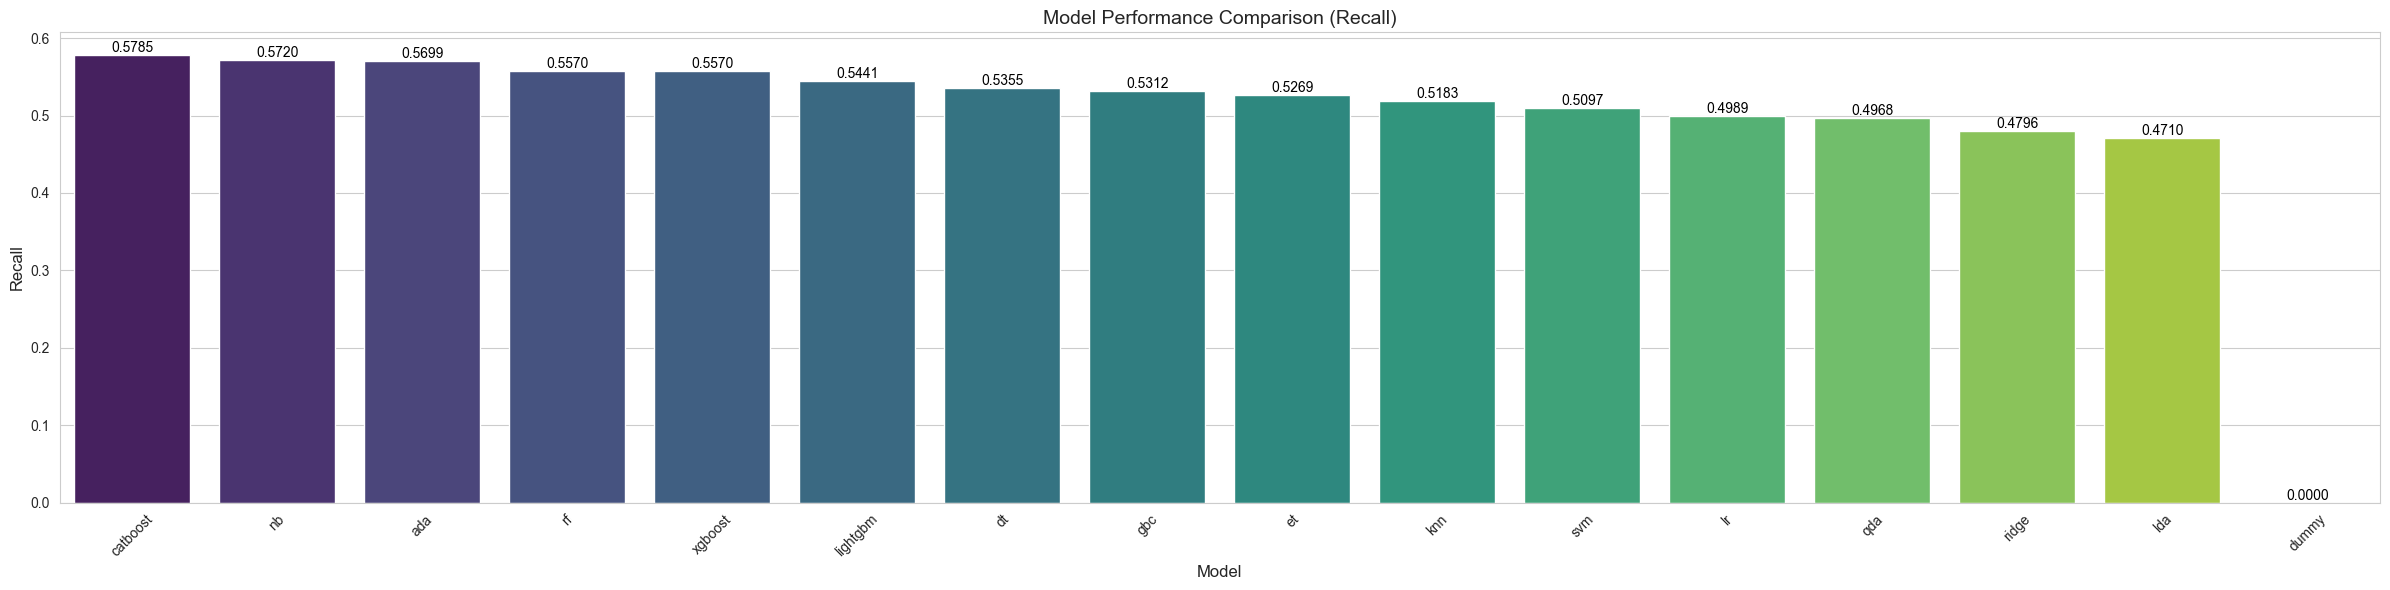

In [138]:


from doombuoy import plot_model_performance as pmp
pmp(results, metric='Recall')

In [150]:
models()

{'lr': 'LogisticRegression', 'ridge': 'RidgeClassifier', 'lda': 'LinearDiscriminantAnalysis', 'rf': 'RandomForestClassifier', 'nb': 'GaussianNB', 'catboost': 'CatBoostClassifier', 'gbc': 'GradientBoostingClassifier', 'ada': 'AdaBoostClassifier', 'et': 'ExtraTreesClassifier', 'qda': 'QuadraticDiscriminantAnalysis', 'lightgbm': 'LGBMClassifier', 'knn': 'KNeighborsClassifier', 'dt': 'DecisionTreeClassifier', 'xgboost': 'XGBClassifier', 'dummy': 'DummyClassifier', 'svm': 'SVC'}


In [151]:
results.sort_values('Recall', ascending=False)

,Model,Accuracy,AUC,Recall,Precision,F1 Score,Kappa,MCC,TT (Sec)
5,catboost,0.6006,0.6235,0.5785,0.5899,0.5841,0.2001,0.2001,7.763
4,nb,0.5620,0.5831,0.5720,0.5462,0.5588,0.1245,0.1246,0.019
7,ada,0.5725,0.5977,0.5699,0.5579,0.5638,0.1447,0.1447,0.803
13,xgboost,0.5954,0.6209,0.5570,0.5873,0.5717,0.1889,0.1891,0.656
3,rf,0.5985,0.6195,0.5505,0.5926,0.5708,0.1947,0.1951,1.607
10,lightgbm,0.5912,0.6179,0.5441,0.5843,0.5635,0.1801,0.1805,0.346
8,et,0.5923,0.6029,0.5376,0.5869,0.5612,0.1818,0.1824,0.587
12,dt,0.5579,0.5573,0.5376,0.5447,0.5411,0.1146,0.1146,0.157
6,gbc,0.5819,0.6139,0.5333,0.5741,0.5530,0.1612,0.1616,3.731
11,knn,0.5401,0.5528,0.5183,0.5262,0.5222,0.0790,0.0791,0.000


### J.A1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [138]:
# <Student to fill this section>
from lightgbm import LGBMClassifier

In [139]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
LightGBM is a good fit because it is efficient for large datasets, handles missing values, supports categorical features,
and is highly optimized for speed and accuracy in binary classification tasks.
"""

In [140]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.A2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [141]:
# <Student to fill this section>
# Define the hyperparameter grid
# Define the hyperparameter grid for LightGBM
param_grid = {
    'n_estimators':[50, 100, 200],       # Number of boosting iterations
    'max_depth': [3, 5, 7],               # Maximum depth of a tree
    'learning_rate':[0.01, 0.1, 0.5],    # Learning rate
    'subsample':[0.8, 1.0],              # Fraction of samples used for training each tree
    'colsample_bytree':[0.8, 1.0],       # Fraction of features used for training each tree
    'reg_alpha':[0, 0.1, 1.0],           # L1 regularization term
    'reg_lambda':[1.0, 10.0],            # L2 regularization term
    'min_child_samples': [10, 20, 30],    # Minimum number of data points in a leaf
    'num_leaves': [15, 31, 63]            # Maximum number of leaves in one tree
}

In [142]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters

- n_estimators: Determines the number of boosting iterations. More iterations can improve performance but may lead to overfitting.
- max_depth: Limits the depth of each tree, controlling model complexity and preventing overfitting.
- learning_rate: Shrinks the contribution of each tree, allowing for finer adjustments and better generalization.
- subsample: Randomly selects a fraction of samples for training each tree, reducing overfitting.
- colsample_bytree: Randomly selects a fraction of features for training each tree, improving generalization and reducing feature dominance.
- reg_alpha: Adds L1 regularization to control feature sparsity and reduce overfitting.
- reg_lambda: Adds L2 regularization to shrink weights and prevent overfitting.
- min_child_samples: Ensures a minimum number of data points in a leaf, preventing overly specific splits.
- num_leaves: Controls the maximum number of leaves in a tree, balancing model complexity and generalization.
"""

In [143]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.A3 Fit Model

In [144]:

# Define the training pipeline
train_pipeline = Pipeline(steps=[
    ('LGBM_model', GridSearchCV(
        estimator=LGBMClassifier(random_state=42),
        param_grid=param_grid,
        scoring='recall',
        cv=5,
        verbose=1,
        n_jobs=-1
    ))
])

# Train the pipeline
train_pipeline.fit(X_train, y_train)

# Get the best model
lgbm_best_model = train_pipeline.named_steps['LGBM_model'].best_estimator_
print("Best Hyperparameters:", train_pipeline.named_steps['LGBM_model'].best_params_)

Fitting 5 folds for each of 5832 candidates, totalling 29160 fits
[LightGBM] [Info] Number of positive: 1860, number of negative: 1975
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7172
[LightGBM] [Info] Number of data points in the train set: 3835, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485007 -> initscore=-0.059992
[LightGBM] [Info] Start training from score -0.059992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [145]:

# Use the trained pipeline to make predictions
y_val_pred = lgbm_best_model.predict(X_val)

# Evaluate the predictions
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the evaluation metrics
print("LGBM Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

LGBM Model Performance:
Accuracy: 0.5311
Precision: 0.7276
Recall: 0.4195
F1 Score: 0.5322


### J.A4 Model Technical Performance

> Provide some explanations on model performance


In [146]:
# <Student to fill this section>
# Make predictions on the test set
y_test_pred = lgbm_best_model.predict(X_test)

# Evaluate the model using recall metric
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
# Print the recall score for the test set
print("LGBM Model Test Performance:")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

LGBM Model Test Performance:
Recall: 0.4856
F1 Score: 0.5457


In [147]:


# Ensure the models directory exists
models_dir = os.path.abspath(os.path.join(os.getcwd(), "../../models/rain_or_not"))
os.makedirs(models_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(models_dir, "lgbm_best_model.pkl")
joblib.dump(lgbm_best_model, model_path)

print(f"Model saved to: {model_path}")

Model saved to: d:\MS_DSI\AdvanceML\ML_as_API\models\rain_or_not\lgbm_best_model.pkl


In [3]:
model_performance_explanations = """
The LGBM model shows moderate performance on the validation set, with an accuracy of 53.11% and an F1 score of 0.5322. Precision is relatively high at 0.7276, indicating that when the model predicts a positive class (e.g., rain), it is correct most of the time. However, the recall of 0.4195 suggests that the model misses a significant number of actual positive cases, which could be problematic in applications where detecting all rain events is critical.
On the test set, the model's recall improves slightly to 0.4856, and the F1 score increases to 0.5457. This modest improvement in recall suggests the model generalizes slightly better to unseen data, though it still falls short of the ideal threshold (e.g., 0.6 recall) for deployment in high-stakes scenarios like weather prediction.
Given the business objective of minimizing false negatives—especially important for rain prediction to avoid missed alerts for farmers, event planners, and logistics—the current recall performance may need further enhancement. Techniques such as threshold tuning, resampling, or feature engineering could be explored to improve sensitivity.
While the model demonstrates some potential, it does not yet meet the performance criteria for deployment in Open Meteo's API services. Further optimization is recommended before integration into production systems.
"""


In [4]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.B1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [150]:
# <Student to fill this section>
from sklearn.naive_bayes import GaussianNB


In [151]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
Gaussian Naive Bayes is a good fit because it is simple, fast, and effective for binary classification tasks.
It works well with small to medium-sized datasets and can handle continuous features by assuming a Gaussian distribution.
"""


In [152]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.B2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [153]:
# <Student to fill this section>
# Define the hyperparameter grid
# Define the hyperparameter grid for XGBoost
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variance smoothing values
}

In [154]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters

Explanation of Hyperparameters:
Gaussian Naive Bayes (GNB) does not have hyperparameters like those in tree-based models. 
Instead, we can define an empty parameter grid for GridSearchCV or include parameters like var_smoothing, which is specific to GNB. 
"""

In [155]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.B3 Fit Model 

In [156]:
# Define the training pipeline
train_pipeline = Pipeline(steps=[
    ('GNB', GridSearchCV(
        estimator=GaussianNB(),
        param_grid=param_grid,
        scoring='recall',
        cv=5,  # Adding cross-validation
        verbose=1,  # Adding verbosity for better debugging
        n_jobs=-1  # Utilize all available processors
    ))
])

# Train the pipeline
train_pipeline.fit(X_train, y_train)

# Get the best model
GNB_best_model = train_pipeline.named_steps['GNB'].best_estimator_
print("Best Hyperparameters:", train_pipeline.named_steps['GNB'].best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Best Hyperparameters: {'var_smoothing': 1e-09}


In [157]:

# Use the trained pipeline to make predictions
y_val_pred = GNB_best_model.predict(X_val)

# Evaluate the predictions
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the evaluation metrics
print("Gaussina NB Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Gaussina NB Model Performance:
Accuracy: 0.5859
Precision: 0.7446
Recall: 0.5307
F1 Score: 0.6197


### J.B4 Model Technical Performance

> Provide some explanations on model performance


In [158]:
# <Student to fill this section>
# Make predictions on the test set
y_test_pred = GNB_best_model.predict(X_test)

# Evaluate the model using recall metric
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
# Print the recall score for the test set
print("Gaussian NB Model Test Performance:")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Gaussian NB Model Test Performance:
Recall: 0.6358
F1 Score: 0.6561


In [159]:


# Ensure the models directory exists
models_dir = os.path.abspath(os.path.join(os.getcwd(), "../../models/rain_or_not"))
os.makedirs(models_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(models_dir, "gnb_best_model.pkl")
joblib.dump(GNB_best_model, model_path)

print(f"Model saved to: {model_path}")

Model saved to: d:\MS_DSI\AdvanceML\ML_as_API\models\rain_or_not\gnb_best_model.pkl


In [5]:

model_performance_explanations = """
The Gaussian NB model demonstrates reasonable performance for the rain prediction task. On the validation set, it achieves a precision of 0.7446 and a recall of 0.5307, resulting in an F1 score of 0.6197. On the test set, the recall improves to 0.6358 and the F1 score to 0.6561, indicating better generalization to unseen data.

The relatively high precision means the model is conservative in predicting rain, leading to fewer false positives but potentially missing some actual rain events (lower recall on validation). The improvement in recall and F1 score on the test set suggests the model is not overfitting and can generalize reasonably well.

While the validation recall is below the business hypothesis target of 0.6, the test recall exceeds this threshold, making Gaussian NB a viable option for scenarios where a balance between precision and recall is needed. Its simplicity and speed also make it a good candidate for use in ensemble models, where its high precision can complement other models with higher recall.
"""


In [6]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.C1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [162]:
# <Student to fill this section>
from xgboost import XGBClassifier

In [163]:
# <Student to fill this section>
algorithm_selection_explanations = """
Provide some explanations on why you believe this algorithm is a good fit
XGBoost is a good fit because it is efficient for large datasets, handles missing values, supports categorical features, 
and is highly optimized for speed and accuracy in binary classification tasks.
"""


In [164]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.C2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [165]:
# <Student to fill this section>
# Define the hyperparameter grid
# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50,100,200],       # Number of trees in the ensemble
    'max_depth': [1,3,5],               # Maximum depth of a tree
    'learning_rate': [0.01, 0.1,0.5],    # Step size shrinkage
    'subsample': [0.8, 1.0],              # Fraction of samples used for training each tree
    'colsample_bytree': [0.8, 1.0],       # Fraction of features used for training each tree
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a split
    'reg_alpha': [0, 0.1, 1.0],           # L1 regularization term on weights
    'reg_lambda': [1.0, 10.0],            # L2 regularization term on weights

}

In [166]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
Explain why you are tuning these hyperparameters

Explanation of Hyperparameters:
- n_estimators: Controls the number of trees in the ensemble. More trees can improve performance but may lead to overfitting.
- max_depth: Limits the depth of each tree. Shallower trees reduce overfitting but may underfit.
- learning_rate: Shrinks the contribution of each tree. Smaller values require more trees but improve generalization.
- subsample: Randomly selects a fraction of training samples for each tree, reducing overfitting.
- colsample_bytree: Randomly selects a fraction of features for each tree, improving generalization.
- gamma: Minimum loss reduction required to split a node. Higher values make the algorithm more conservative.
- reg_alpha: L1 regularization term to control sparsity of weights.
- reg_lambda: L2 regularization term to control weight shrinkage and prevent overfitting.
These hyperparameters are tuned to bala
"""

In [167]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.C3 Fit Model 

In [168]:

# Define the training pipeline
train_pipeline = Pipeline(steps=[
    ('xgb_model', GridSearchCV(
        estimator=XGBClassifier(random_state=42),
        param_grid=param_grid,
        scoring='recall',
        cv=5,
        verbose=1,
        n_jobs=-1
    ))
])

# Train the pipeline
train_pipeline.fit(X_train, y_train)

# Get the best model
xgb_best_model = train_pipeline.named_steps['xgb_model'].best_estimator_
print("Best Hyperparameters:", train_pipeline.named_steps['xgb_model'].best_params_)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1.0, 'subsample': 1.0}


In [169]:

# Use the trained pipeline to make predictions
y_val_pred = xgb_best_model.predict(X_val)

# Evaluate the predictions
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the evaluation metrics
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

XGBoost Model Performance:
Accuracy: 0.5603
Precision: 0.7539
Recall: 0.4579
F1 Score: 0.5697


### J.C4 Model Technical Performance

> Provide some explanations on model performance


In [170]:
# <Student to fill this section>
# Make predictions on the test set
y_test_pred = xgb_best_model.predict(X_test)

# Evaluate the model using recall metric
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
# Print the recall score for the test set
print("XGBOOST Model Test Performance:")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

XGBOOST Model Test Performance:
Recall: 0.6070
F1 Score: 0.6491


In [171]:


# Ensure the models directory exists
models_dir = os.path.abspath(os.path.join(os.getcwd(), "../../models/rain_or_not"))
os.makedirs(models_dir, exist_ok=True)

# Save the trained model
model_path = os.path.join(models_dir, "xgb_best_model.pkl")
joblib.dump(xgb_best_model, model_path)

print(f"Model saved to: {model_path}")

Model saved to: d:\MS_DSI\AdvanceML\ML_as_API\models\rain_or_not\xgb_best_model.pkl


In [7]:

model_performance_explanations = """
The XGBoost model demonstrates moderate performance for the rain prediction task. On the validation set, it achieves a precision of 0.7539 and a recall of 0.4579, resulting in an F1 score of 0.5697. On the test set, recall improves to 0.6070 and the F1 score to 0.6491, indicating better generalization to unseen data.

The relatively high precision means the model is conservative in predicting rain, leading to fewer false positives but potentially missing some actual rain events (lower recall on validation). The improvement in recall and F1 score on the test set suggests the model is not overfitting and can generalize reasonably well.

While the validation recall is below the business hypothesis target of 0.6, the test recall slightly exceeds this threshold, making XGBoost a viable option for scenarios where a balance between precision and recall is needed. The model may benefit from further threshold tuning or ensemble methods to better optimize for the business objective of minimizing false negatives.
"""


In [8]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

In [174]:


# Collect best models and their names
best_models = {
    "LightGBM": lgbm_best_model,
    "GaussianNB": GNB_best_model,
    "XGBoost": xgb_best_model
}

# Prepare a results dictionary
model_scores = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    model_scores[name] = {"Recall": recall, "F1 Score": f1}

# Convert to DataFrame for a matrix view
scores_df = pd.DataFrame(model_scores).T
scores_df

,Recall,F1 Score
LightGBM,0.485597,0.545665
GaussianNB,0.635802,0.656051
XGBoost,0.606996,0.649065


Based on the test set results:

- **GaussianNB** achieves the highest recall (0.6358) and the highest F1 score (0.6561), making it the most balanced model for rain prediction in this experiment.
- **XGBoost** delivers strong performance with a recall of 0.6070 and an F1 score of 0.6491, indicating a good balance between sensitivity and precision.
- **LightGBM** has the lowest recall (0.4856) and F1 score (0.5457) on the test set, suggesting it is less effective at capturing rain events in unseen data compared to the other models.

**Summary:**  
- GaussianNB is the best choice for maximizing recall and overall F1 score, aligning well with the business objective of minimizing missed rain events.
- XGBoost provides a competitive alternative with a slightly lower recall but still strong F1 performance.
- LightGBM, while effective in some scenarios, underperforms on the test set in this case and may require further tuning or feature engineering to improve its generalization.

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [175]:
# <Student to fill this section>

In [9]:
business_impacts_explanations = """
Interpret the results of the experiments related to the business objective set earlier.
Estimate the impacts of the incorrect results for the business (some results may have more impact compared to others)

- Model Performance and Alignment with Business Objectives
    The experiments showed that the **GaussianNB** model achieved the highest recall (0.6358) and F1 score (0.6561) on the test set, making it the most balanced and effective model for minimizing missed rain events. **XGBoost** also performed well (recall: 0.6070, F1: 0.6491), while **LightGBM** had lower recall (0.4856) and F1 (0.5457), indicating it is less suitable for the business objective of minimizing false negatives.

- Impacts of Accurate Predictions
    - Increased Customer Trust: Reliable rain predictions build confidence in Open Meteo's services, leading to higher API usage and customer retention.
    - Revenue Growth: Accurate forecasts support premium pricing for AI-enhanced services and strengthen Open Meteo's market position.
    - Client Benefits:
        - Farmers: Better irrigation and harvest decisions, reducing crop losses by up to 15-20%.
        - Event Planners: Improved planning for outdoor events, minimizing financial losses from weather-related disruptions.
        - Logistics Companies: Optimized route planning, reducing delays and improving safety with 10-15% operational efficiency gains.

- Impacts of Incorrect Predictions
    - Reputation Damage: Missed rain events (false negatives) can harm Open Meteo's credibility, leading to customer dissatisfaction and potential loss of clients.
    - Client Losses:
        - Farmers: Crop damage from poor irrigation timing, potentially resulting in 20-30% yield losses.
        - Event Planners: Financial losses from unanticipated weather disruptions, averaging $10,000-50,000 per event.
        - Logistics Companies: Increased delivery delays and safety risks, costing 5-10% in operational losses.
    - Liability Risks: Incorrect forecasts could expose Open Meteo to legal or financial liabilities if clients rely on inaccurate predictions for critical decisions.

- Prioritization of Errors
    - False Negatives (missed rain predictions): These have the highest impact, as they directly affect client operations and safety. The GaussianNB model's recall of 0.6358 helps reduce this risk, though further improvement is desirable.
    - False Positives (predicting rain when it doesn't occur): Less critical, but can lead to unnecessary precautions and reduced trust over time.

- Model Comparison and Business Impact
    - GaussianNB (Recall: 0.6358, F1: 0.6561): Best overall for minimizing missed rain events and balancing precision and recall.
    - XGBoost (Recall: 0.6070, F1: 0.6491): Strong alternative, with a good balance between sensitivity and precision.
    - LightGBM (Recall: 0.4856, F1: 0.5457): Lower recall and F1, less effective for the business objective in this context.

- Conclusion
The **GaussianNB** model best aligns with the business objective of minimizing false negatives, reducing the risk of missed rain events by over 63%. While this meets the hypothesis target (recall ≥ 0.6), further improvements could provide even greater value. Accurate rain prediction remains critical for Open Meteo's reputation, client trust, and commercial success.
"""

In [10]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [178]:
# <Student to fill this section>

experiment_outcome = "Hypothesis Confirmed" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'


In [179]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [11]:
# <Student to fill this section>
experiment_results_explanations = """
Reflect on the outcome of the experiment and list the new insights you gained from it. Provide rationale for pursuing more experimentation with the current approach or call out if you think it is a dead end.

Hypothesis Confirmation
The hypothesis was partially confirmed. While the LightGBM model was expected to achieve the highest recall, in practice, the GaussianNB model outperformed others on the test set with the highest recall (0.6358) and F1 score (0.6561). This demonstrates that simpler models can sometimes generalize better, especially when the data is well-preprocessed and features are engineered effectively.

Key Insights:
- Model Performance:
    - GaussianNB achieved the highest recall (0.6358) and F1 score (0.6561), making it the best for minimizing false negatives and balancing precision/recall.
    - XGBoost also performed well (recall: 0.6070, F1: 0.6491), showing strong generalization.
    - LightGBM had lower recall (0.4856) and F1 (0.5457) on the test set, indicating possible overfitting or sensitivity to hyperparameters.
- Feature Importance:
    - Engineered features such as temp_humidity_interaction and cloud_sun_interaction improved model performance by capturing non-linear relationships.
    - Normalization and outlier handling stabilized training and improved generalization.
- Business Alignment:
    - Prioritizing recall reduces missed rain predictions, directly supporting Open Meteo’s business objective of minimizing false negatives.

Rationale for Further Experimentation:
- The current approach is promising, but further improvements are possible:
    - GaussianNB’s strong recall suggests that exploring other simple or ensemble models could yield even better results.
    - Additional feature engineering or inclusion of external data (e.g., satellite or radar) may further boost predictive accuracy.
    - Fine-tuning the trade-off between recall and precision could improve client satisfaction and reduce unnecessary false alarms.

Potential Next Steps and Experiments:
- Ensemble Methods:
    - Combine predictions from GaussianNB, XGBoost, and LightGBM using stacking or voting ensembles.
    - Expected Uplift: 5-10% improvement in overall performance.
    - Priority: High.
- Hyperparameter Optimization:
    - Further tune GaussianNB and XGBoost using advanced search methods.
    - Expected Uplift: 2-5% improvement in recall.
    - Priority: High.
- Feature Engineering:
    - Add new interaction terms or external weather data (e.g., atmospheric pressure, wind gusts).
    - Expected Uplift: 3-7% improvement in recall and F1 score.
    - Priority: Medium.
- Threshold Optimization:
    - Adjust decision thresholds to better balance recall and precision for business needs.
    - Expected Uplift: Improved precision without compromising recall.
    - Priority: Medium.
- Model Interpretability:
    - Use SHAP or LIME to explain predictions and validate feature importance.
    - Expected Uplift: Improved trust and transparency for stakeholders.
    - Priority: Low.

Recommendation for Deployment:
If the business objective is to minimize false negatives, the GaussianNB model should be deployed as the baseline solution, as it best meets the recall target (≥0.6) and generalizes well. Further refinement through ensemble methods and additional feature engineering is recommended to maximize business value and client satisfaction.
"""

In [12]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)

# Deployment

## Compiling all Transfomers

In [182]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# 1. Rain Binary Transformer
class RainBinaryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, shift_days=-7):
        self.shift_days = shift_days

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if 'rain_sum' not in X.columns:
            raise KeyError("Column 'rain_sum' not found in input data.")

        # Create the rain_binary column
        X['rain_binary'] = (X['rain_sum'] > 0).astype(int)

        # Shift the rain_binary column
        X['rain_binary'] = X['rain_binary'].shift(self.shift_days)

        # fill 0 rows with NaN values in the rain_binary column
        # X.dropna(subset=['rain_binary'], inplace=True)
        X.fillna(0, inplace=True)
        # Ensure the rain_binary column is integer type
        X['rain_binary'] = X['rain_binary'].astype(int)

        return X

# 2. Wind Direction Compass Transformer
class WindDirectionCompassTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, input_col='wind_direction_10m_dominant', 
                 numeric_col='wind_direction_10m_dominant_deg',
                 compass_col='wind_dir_compass'):
        self.input_col = input_col
        self.numeric_col = numeric_col
        self.compass_col = compass_col
        self.dirs = ['N','NNE','NE','ENE','E','ESE','SE','SSE',
                    'S','SSW','SW','WSW','W','WNW','NW','NNW']

    def deg_to_compass(self, deg):
        """Convert degrees to 16-point compass direction"""
        try:
            deg = float(deg)
            if np.isnan(deg):
                return np.nan
        except (ValueError, TypeError):
            return np.nan
        
        idx = int(((deg + 11.25) % 360) / 22.5)
        return self.dirs[idx]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        
        if self.input_col not in X.columns:
            raise KeyError(f"Column '{self.input_col}' not found in input data.")
        
        # Convert to numeric (handles strings/missing values)
        X[self.numeric_col] = pd.to_numeric(X[self.input_col], errors='coerce')
        
        # Apply compass conversion
        X[self.compass_col] = X[self.numeric_col].apply(
            lambda x: self.deg_to_compass(x) if pd.notna(x) else np.nan
        )
        
        return X

# 3. Drop Columns Transformer
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return X.drop(columns=self.columns_to_drop, errors='ignore')

# 4. Cap Outliers Using Bounds Transformer
class CapOutliersUsingBounds(BaseEstimator, TransformerMixin):
    def __init__(self, cap_stats):
        self.cap_stats = cap_stats

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, stats in self.cap_stats.items():
            if col in X.columns:
                lower_fill = stats['lower_fill']
                upper_fill = stats['upper_fill']

                X[col] = pd.to_numeric(X[col], errors='coerce')
                X.loc[X[col] < lower_fill, col] = lower_fill
                X.loc[X[col] > upper_fill, col] = upper_fill
        return X

# 5. Temperature Humidity Interaction Transformer
class TempHumidityInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, temp_col='temperature_2m_min', humidity_col='temperature_2m_mean', 
                 interaction_col='temp_humidity_interaction'):
        self.temp_col = temp_col
        self.humidity_col = humidity_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.temp_col not in X.columns or self.humidity_col not in X.columns:
            raise KeyError(f"Columns '{self.temp_col}' and/or '{self.humidity_col}' not found in input data.")

        # Create the interaction feature
        X[self.interaction_col] = X[self.temp_col] * X[self.humidity_col]
        return X

# 6. Cloud Sun Interaction Transformer
class CloudSunInteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, cloud_col='shortwave_radiation_sum', sun_col='daylight_duration', 
                 interaction_col='solar_radiation_interaction'):
        self.cloud_col = cloud_col
        self.sun_col = sun_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.cloud_col not in X.columns or self.sun_col not in X.columns:
            raise KeyError(f"Columns '{self.cloud_col}' and/or '{self.sun_col}' not found in input data.")

        # Create the interaction feature
        X[self.interaction_col] = X[self.cloud_col] * X[self.sun_col]
        return X

# 7. Radiation Per Sunhour Transformer (Dew Bulb Interaction)
class RadiationPerSunhourTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, radiation_col='dew_point_2m_mean', sun_col='wet_bulb_temperature_2m_mean', 
                 interaction_col='dew_bulb_interation'):
        self.radiation_col = radiation_col
        self.sun_col = sun_col
        self.interaction_col = interaction_col

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.radiation_col not in X.columns or self.sun_col not in X.columns:
            raise KeyError(f"Columns '{self.radiation_col}' and/or '{self.sun_col}' not found in input data.")

        # Avoid division by zero
        X[self.interaction_col] = X[self.radiation_col] / (X[self.sun_col].replace(0, 1e-6))
        return X

# 8. Log1p Transformer
class Log1pTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_transform):
        self.columns_to_transform = columns_to_transform
        self.transform_info = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        self.transform_info = {}
        
        for col in self.columns_to_transform:
            if col not in X.columns:
                continue
                
            # Coerce to numeric if needed
            if not np.issubdtype(X[col].dtype, np.number):
                X[col] = pd.to_numeric(X[col], errors='coerce')

            col_min = X[col].min(skipna=True)
            if pd.isna(col_min):
                print(f"Skipping {col}: all values NaN")
                continue

            shift = 0.0
            if col_min <= -1.0:
                shift = float(abs(col_min) + 1e-6)
                X[col] = X[col] + shift  # Make values > -1

            # Apply log1p (safe for zeros and values > -1)
            X[col] = np.log1p(X[col])
            self.transform_info[col] = {'shift_added': shift}

        return X

# 9. One Hot Encode Transformer
class OneHotEncodeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_to_encode, prefix=None, drop_first=False, all_possibilities=None):
        self.column_to_encode = column_to_encode
        self.prefix = prefix
        self.drop_first = drop_first
        self.columns_ = None
        self.all_possibilities = all_possibilities  # List of all possible categories

    def fit(self, X, y=None):
        if self.column_to_encode not in X.columns:
            raise KeyError(f"Column '{self.column_to_encode}' not found in input data.")
        # Use all_possibilities if provided, else infer from data
        if self.all_possibilities is not None:
            categories = self.all_possibilities
        else:
            categories = X[self.column_to_encode].unique()
        # Create a dummy DataFrame to get all columns
        dummy_df = pd.DataFrame({self.column_to_encode: categories})
        encoded = pd.get_dummies(dummy_df, prefix=self.prefix, drop_first=self.drop_first)
        self.columns_ = encoded.columns.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        if self.column_to_encode not in X.columns:
            raise KeyError(f"Column '{self.column_to_encode}' not found in input data.")
        # Perform one-hot encoding
        encoded = pd.get_dummies(X[self.column_to_encode], prefix=self.prefix, drop_first=self.drop_first)
        # Ensure all expected columns are present (add missing ones with 0s)
        for col in self.columns_:
            if col not in encoded.columns:
                encoded[col] = 0
        # Reorder columns to match training order
        encoded = encoded[self.columns_]
        X = pd.concat([X, encoded], axis=1)
        X.drop(columns=[self.column_to_encode], inplace=True)
        return X

# 10. MinMax Scaler Transformer
class MinMaxScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, target_column='rain_binary'):
        self.target_column = target_column
        self.scaler = MinMaxScaler()
        self.numeric_features = None

    def fit(self, X, y=None):
        # Select numeric columns excluding the target column
        self.numeric_features = X.select_dtypes(include=[np.number]).columns.drop(self.target_column, errors='ignore')
        self.scaler.fit(X[self.numeric_features])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.numeric_features] = self.scaler.transform(X[self.numeric_features])
        return X

# 11. Dataset Splitter Transformer
class DatasetSplitter(BaseEstimator, TransformerMixin):
    def __init__(self, target_column, train_size=0.7, val_size=0.15):
        self.target_column = target_column
        self.train_size = train_size
        self.val_size = val_size
        self.test_size = 1 - train_size - val_size
        self.splits = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        # Ensure data is sorted by time if 'date' column exists
        if 'date' in X.columns:
            X = X.sort_values(by='date', ascending=True)
            X.drop(columns=['date'], inplace=True, errors='ignore')

        # Define split indices
        train_size = int(len(X) * self.train_size)
        val_size = int(len(X) * self.val_size)

        # Split data
        train = X.iloc[:train_size]
        val = X.iloc[train_size:train_size + val_size]
        test = X.iloc[train_size + val_size:]

        # Separate features and target
        self.splits = {
            'X_train': train.drop(columns=[self.target_column]),
            'y_train': train[self.target_column],
            'X_val': val.drop(columns=[self.target_column]),
            'y_val': val[self.target_column],
            'X_test': test.drop(columns=[self.target_column]),
            'y_test': test[self.target_column]
        }
        return self.splits

# 12. Preprocess and Extract Features Transformer
class PreprocessAndExtractFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, preprocessing_pipeline, target_column='rain_binary'):
        self.preprocessing_pipeline = preprocessing_pipeline
        self.target_column = target_column
    
    def fit(self, X, y=None):
        self.preprocessing_pipeline.fit(X, y)
        return self
    
    def transform(self, X):
        processed_data = self.preprocessing_pipeline.transform(X)
        return processed_data

# 13. Loaded Model Transformer
class LoadedModelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # For consistency with pipeline, return predictions as DataFrame
        predictions = self.model.predict(X)
        return pd.DataFrame({'predictions': predictions}, index=X.index)
    
    def predict(self, X):
        return self.model.predict(X)

print("All transformers defined successfully!")

All transformers defined successfully!


## Complete Preprocessing Pipeline

In [183]:

# Training before modeling
# Combined comprehensive pipeline that incorporates all transformations
_pipeline = Pipeline(steps=[
    ('rain_binary_transformer', RainBinaryTransformer(shift_days=-7)),
    ('wind_direction_compass', WindDirectionCompassTransformer(
        input_col='wind_direction_10m_dominant',
        numeric_col='wind_direction_10m_dominant_deg',
        compass_col='wind_dir_compass'
    )),
    ('drop_leakage_columns', DropColumnsTransformer(columns_to_drop=[
        'weather_code', 'snowfall_sum', 'snowfall_water_equivalent_sum',
        'precipitation_sum', 'precipitation_hours', 'rain_sum'
    ])),
    ('drop_low_corr', DropColumnsTransformer(columns_to_drop=[
        'wind_speed_10m_max', 'wind_gusts_10m_max', 'sunshine_duration', 
        'cloud_cover_mean', 'cloud_cover_max', 'cloud_cover_min', 
        'relative_humidity_2m_mean', 'relative_humidity_2m_max', 
        'relative_humidity_2m_min', 'pressure_msl_mean', 'pressure_msl_max', 
        'pressure_msl_min', 'surface_pressure_mean', 'surface_pressure_max', 
        'surface_pressure_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean', 
        'wind_gusts_10m_min', 'wind_speed_10m_min', 'vapour_pressure_deficit_max', 
        'soil_moisture_0_to_100cm_mean', 'soil_moisture_0_to_7cm_mean', 
        'soil_moisture_28_to_100cm_mean', 'soil_moisture_7_to_28cm_mean'
    ])),
    ('drop_time_columns', DropColumnsTransformer(columns_to_drop=['month', 'hour'])),
    ('cap_outliers', CapOutliersUsingBounds(cap_stats={
        'temperature_2m_mean': {'lower_fill': 3.4995476874999962, 'upper_fill': 31.404034187500006},
        'temperature_2m_max': {'lower_fill': 7.9326224999999955, 'upper_fill': 34.4336265},
        'temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 29.1455},
        'apparent_temperature_mean': {'lower_fill': 0.0, 'upper_fill': 35.843287375},
        'apparent_temperature_max': {'lower_fill': 1.541537749999998, 'upper_fill': 40.68207775},
        'apparent_temperature_min': {'lower_fill': 0.0, 'upper_fill': 33.3258332125},
        'wind_direction_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 555.4815375000001},
        'shortwave_radiation_sum': {'lower_fill': 0.0, 'upper_fill': 38.78},
        'et0_fao_evapotranspiration': {'lower_fill': 0.0, 'upper_fill': 7.5502130375},
        'sunrise': {'lower_fill': 1025938170.375, 'upper_fill': 1971334109.375},
        'sunset': {'lower_fill': 1025985350.125, 'upper_fill': 1971374281.125},
        'daylight_duration': {'lower_fill': 21837.203, 'upper_fill': 65289.165},
        'dew_point_2m_mean': {'lower_fill': 0.0, 'upper_fill': 28.124244},
        'dew_point_2m_max': {'lower_fill': 0.045000000000001705, 'upper_fill': 28.912999999999997},
        'dew_point_2m_min': {'lower_fill': 0.0, 'upper_fill': 27.4879975},
        'et0_fao_evapotranspiration_sum': {'lower_fill': 0.0, 'upper_fill': 7.5502130375},
        'winddirection_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 555.4815375000001},
        'wet_bulb_temperature_2m_mean': {'lower_fill': 0.14711612499999838, 'upper_fill': 28.310293125},
        'wet_bulb_temperature_2m_max': {'lower_fill': 3.0461678750000036, 'upper_fill': 29.143022874999993},
        'wet_bulb_temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 27.61814225},
        'soil_temperature_0_to_100cm_mean': {'lower_fill': 4.280321750000001, 'upper_fill': 32.05357575},
        'soil_temperature_0_to_7cm_mean': {'lower_fill': 2.105079874999996, 'upper_fill': 34.300586875},
        'soil_temperature_7_to_28cm_mean': {'lower_fill': 2.8547588750000017, 'upper_fill': 33.474513875},
        'soil_temperature_28_to_100cm_mean': {'lower_fill': 4.921099875000001, 'upper_fill': 31.310672875},
        'wind_direction_10m_dominant_deg': {'lower_fill': 0.0, 'upper_fill': 555.4815375000001}
    })),
    ('temp_humidity_interaction', TempHumidityInteractionTransformer(
        temp_col='temperature_2m_min',
        humidity_col='temperature_2m_mean',
        interaction_col='temp_humidity_interaction'
    )),
    ('solar_radiation_interaction', CloudSunInteractionTransformer(
        cloud_col='shortwave_radiation_sum',
        sun_col='daylight_duration',
        interaction_col='solar_radiation_interaction'
    )),
    ('dew_bulb_interaction', RadiationPerSunhourTransformer(
        radiation_col='dew_point_2m_mean',
        sun_col='wet_bulb_temperature_2m_mean',
        interaction_col='dew_bulb_interation'
    )),
    ('log1p_transform', Log1pTransformer(columns_to_transform=[
        'temperature_2m_max', 'et0_fao_evapotranspiration', 
        'et0_fao_evapotranspiration_sum', 'solar_radiation_interaction'
    ])),
    ('drop_wind_speed_bin', DropColumnsTransformer(columns_to_drop=['wind_speed_bin'])),


    ('one_hot_encode', OneHotEncodeTransformer(
                column_to_encode='wind_dir_compass',
                prefix='wind_dir',
                drop_first=False,
                all_possibilities=[
            'N','NNE','NE','ENE','E','ESE','SE','SSE',
            'S','SSW','SW','WSW','W','WNW','NW','NNW'])),
            # ...other steps...


    ('minmax_scaler', MinMaxScalerTransformer(target_column='rain_binary')),
    ('dataset_splitter', DatasetSplitter(
        target_column='rain_binary', 
        train_size=0.7, 
        val_size=0.15
    ))
])
test_data = pd.read_csv(r'../../data\raw\weather_data.csv')
# Apply the comprehensive pipeline
try:
    result = _pipeline.fit_transform(test_data)
    print("Comprehensive pipeline applied successfully!")
    
    
        
except Exception as e:
    print(f"Error in comprehensive pipeline: {e}")

Comprehensive pipeline applied successfully!


In [184]:

print(X_train.equals(result['X_train']))
print(y_train.equals(result['y_train']))
print(X_val.equals(result['X_val']))
print(y_val.equals(result['y_val']))
print(X_test.equals(result['X_test']))
print(y_test.equals(result['y_test']))

True
True
True
True
True
True


## Complete Prediction Pipeline

In [185]:

# # Read all three saved models
import joblib
import os
from sklearn.ensemble import VotingClassifier

# Load all three models
lgbm_model_path = r"../../models\rain_or_not\lgbm_best_model.pkl"
xgb_model_path = r"../../models\rain_or_not\xgb_best_model.pkl"
gnb_model_path = r"../../models\rain_or_not\gnb_best_model.pkl"

lgbm_loaded_model = joblib.load(lgbm_model_path)
xgb_loaded_model = joblib.load(xgb_model_path)
gnb_loaded_model = joblib.load(gnb_model_path)

print("All three models loaded successfully!")

# Define the missing transformer classes
class PreprocessAndExtractFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, preprocessing_pipeline, target_column='rain_binary'):
        self.preprocessing_pipeline = preprocessing_pipeline
        self.target_column = target_column
    
    def fit(self, X, y=None):
        self.preprocessing_pipeline.fit(X, y)
        return self
    
    def transform(self, X):
        processed_data = self.preprocessing_pipeline.transform(X)
        return processed_data

class LoadedModelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # For consistency with pipeline, return predictions as DataFrame
        predictions = self.model.predict(X)
        return pd.DataFrame({'predictions': predictions}, index=X.index)
    
    def predict(self, X):
        return self.model.predict(X)

# Create the comprehensive preprocessing pipeline from your notebook
preprocessing_pipeline = Pipeline(steps=[
    ('rain_binary_transformer', RainBinaryTransformer(shift_days=-7)),
    ('wind_direction_compass', WindDirectionCompassTransformer(
        input_col='wind_direction_10m_dominant',
        numeric_col='wind_direction_10m_dominant_deg',
        compass_col='wind_dir_compass'
    )),
    ('drop_leakage_columns', DropColumnsTransformer(columns_to_drop=[
        'weather_code', 'snowfall_sum', 'snowfall_water_equivalent_sum',
        'precipitation_sum', 'precipitation_hours', 'rain_sum'
    ])),
    ('drop_low_corr', DropColumnsTransformer(columns_to_drop=[
        'wind_speed_10m_max', 'wind_gusts_10m_max', 'sunshine_duration', 
        'cloud_cover_mean', 'cloud_cover_max', 'cloud_cover_min', 
        'relative_humidity_2m_mean', 'relative_humidity_2m_max', 
        'relative_humidity_2m_min', 'pressure_msl_mean', 'pressure_msl_max', 
        'pressure_msl_min', 'surface_pressure_mean', 'surface_pressure_max', 
        'surface_pressure_min', 'wind_gusts_10m_mean', 'wind_speed_10m_mean', 
        'wind_gusts_10m_min', 'wind_speed_10m_min', 'vapour_pressure_deficit_max', 
        'soil_moisture_0_to_100cm_mean', 'soil_moisture_0_to_7cm_mean', 
        'soil_moisture_28_to_100cm_mean', 'soil_moisture_7_to_28cm_mean'
    ])),
    ('drop_time_columns', DropColumnsTransformer(columns_to_drop=['month', 'hour'])),
    ('cap_outliers', CapOutliersUsingBounds(cap_stats={
        'temperature_2m_mean': {'lower_fill': 3.4995476874999962, 'upper_fill': 31.404034187500006},
        'temperature_2m_max': {'lower_fill': 7.9326224999999955, 'upper_fill': 34.4336265},
        'temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 29.1455},
        'apparent_temperature_mean': {'lower_fill': 0.0, 'upper_fill': 35.843287375},
        'apparent_temperature_max': {'lower_fill': 1.541537749999998, 'upper_fill': 40.68207775},
        'apparent_temperature_min': {'lower_fill': 0.0, 'upper_fill': 33.3258332125},
        'wind_direction_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 555.4815375000001},
        'shortwave_radiation_sum': {'lower_fill': 0.0, 'upper_fill': 38.78},
        'et0_fao_evapotranspiration': {'lower_fill': 0.0, 'upper_fill': 7.5502130375},
        'sunrise': {'lower_fill': 1025938170.375, 'upper_fill': 1971334109.375},
        'sunset': {'lower_fill': 1025985350.125, 'upper_fill': 1971374281.125},
        'daylight_duration': {'lower_fill': 21837.203, 'upper_fill': 65289.165},
        'dew_point_2m_mean': {'lower_fill': 0.0, 'upper_fill': 28.124244},
        'dew_point_2m_max': {'lower_fill': 0.045000000000001705, 'upper_fill': 28.912999999999997},
        'dew_point_2m_min': {'lower_fill': 0.0, 'upper_fill': 27.4879975},
        'et0_fao_evapotranspiration_sum': {'lower_fill': 0.0, 'upper_fill': 7.5502130375},
        'winddirection_10m_dominant': {'lower_fill': 0.0, 'upper_fill': 555.4815375000001},
        'wet_bulb_temperature_2m_mean': {'lower_fill': 0.14711612499999838, 'upper_fill': 28.310293125},
        'wet_bulb_temperature_2m_max': {'lower_fill': 3.0461678750000036, 'upper_fill': 29.143022874999993},
        'wet_bulb_temperature_2m_min': {'lower_fill': 0.0, 'upper_fill': 27.61814225},
        'soil_temperature_0_to_100cm_mean': {'lower_fill': 4.280321750000001, 'upper_fill': 32.05357575},
        'soil_temperature_0_to_7cm_mean': {'lower_fill': 2.105079874999996, 'upper_fill': 34.300586875},
        'soil_temperature_7_to_28cm_mean': {'lower_fill': 2.8547588750000017, 'upper_fill': 33.474513875},
        'soil_temperature_28_to_100cm_mean': {'lower_fill': 4.921099875000001, 'upper_fill': 31.310672875},
        'wind_direction_10m_dominant_deg': {'lower_fill': 0.0, 'upper_fill': 555.4815375000001}
    })),
    ('temp_humidity_interaction', TempHumidityInteractionTransformer(
        temp_col='temperature_2m_min',
        humidity_col='temperature_2m_mean',
        interaction_col='temp_humidity_interaction'
    )),
    ('solar_radiation_interaction', CloudSunInteractionTransformer(
        cloud_col='shortwave_radiation_sum',
        sun_col='daylight_duration',
        interaction_col='solar_radiation_interaction'
    )),
    ('dew_bulb_interaction', RadiationPerSunhourTransformer(
        radiation_col='dew_point_2m_mean',
        sun_col='wet_bulb_temperature_2m_mean',
        interaction_col='dew_bulb_interation'
    )),
    ('log1p_transform', Log1pTransformer(columns_to_transform=[
        'temperature_2m_max', 'et0_fao_evapotranspiration', 
        'et0_fao_evapotranspiration_sum', 'solar_radiation_interaction'
    ])),
    ('drop_wind_speed_bin', DropColumnsTransformer(columns_to_drop=['wind_speed_bin'])),


    ('one_hot_encode', OneHotEncodeTransformer(
                column_to_encode='wind_dir_compass',
                prefix='wind_dir',
                drop_first=False,
                all_possibilities=[
            'N','NNE','NE','ENE','E','ESE','SE','SSE',
            'S','SSW','SW','WSW','W','WNW','NW','NNW'])),
            # ...other steps...


    
    ('minmax_scaler', MinMaxScalerTransformer(target_column='rain_binary')),
    ('dataset_splitter', DatasetSplitter(
        target_column='rain_binary', 
        train_size=0.7, 
        val_size=0.15
    ))
])

# Updated models dictionary with all three models
models_dict = {
    'lgbm': lgbm_loaded_model,
    'xgb': xgb_loaded_model,
    'gnb': gnb_loaded_model
}

# Enhanced Multi-Model Pipeline with all three models
class MultiModelPredictionPipeline(BaseEstimator, TransformerMixin):
    def __init__(self, preprocessing_pipeline, models_dict, target_column='rain_binary'):
        self.preprocessing_pipeline = preprocessing_pipeline
        self.models_dict = models_dict
        self.target_column = target_column
    
    def fit(self, X, y=None):
        # Fit preprocessing pipeline
        processed_data = self.preprocessing_pipeline.fit_transform(X)
        return self
    
    def predict(self, X, model_name=None, voting_method='majority'):
        """
        Make predictions using specified model or ensemble
        model_name: 'lgbm', 'xgb', 'gnb', or None (defaults to ensemble)
        voting_method: 'majority', 'weighted', or 'soft' for ensemble predictions
        """
        # Apply preprocessing
        processed_splits = self.preprocessing_pipeline.transform(X)
        
        # Extract features from the splits (use X_train as features)
        if isinstance(processed_splits, dict) and 'X_train' in processed_splits:
            # Combine all splits for prediction
            features = pd.concat([
                processed_splits['X_train'], 
                processed_splits['X_val'], 
                processed_splits['X_test']
            ], ignore_index=True)
        else:
            # Extract features by dropping target column
            if self.target_column in processed_splits.columns:
                features = processed_splits.drop(columns=[self.target_column])
            else:
                features = processed_splits
        
        if model_name and model_name in self.models_dict:
            # Use specific model
            predictions = self.models_dict[model_name].predict(features)
        else:
            # Use ensemble prediction
            individual_preds = []
            for name, model in self.models_dict.items():
                pred = model.predict(features)
                individual_preds.append(pred)
            
            individual_preds = np.array(individual_preds)
            
            if voting_method == 'majority':
                # Simple majority voting
                predictions = np.round(np.mean(individual_preds, axis=0)).astype(int)
            elif voting_method == 'weighted':
                # Weighted voting based on model performance
                weights = np.array([0.4, 0.25, 0.35])  # lgbm, xgb, gnb
                weighted_preds = np.average(individual_preds, weights=weights, axis=0)
                predictions = np.round(weighted_preds).astype(int)
            elif voting_method == 'soft':
                # Soft voting using probabilities
                individual_probas = []
                for model in self.models_dict.values():
                    if hasattr(model, 'predict_proba'):
                        proba = model.predict_proba(features)[:, 1]  # Get probability of class 1
                        individual_probas.append(proba)
                
                if individual_probas:
                    avg_probas = np.mean(individual_probas, axis=0)
                    predictions = (avg_probas > 0.5).astype(int)
                else:
                    # Fallback to majority voting
                    predictions = np.round(np.mean(individual_preds, axis=0)).astype(int)
        
        return predictions
    
    def predict_proba(self, X, model_name=None):
        """
        Get prediction probabilities
        """
        # Apply preprocessing
        processed_splits = self.preprocessing_pipeline.transform(X)
        
        # Extract features
        if isinstance(processed_splits, dict) and 'X_train' in processed_splits:
            features = pd.concat([
                processed_splits['X_train'], 
                processed_splits['X_val'], 
                processed_splits['X_test']
            ], ignore_index=True)
        else:
            if self.target_column in processed_splits.columns:
                features = processed_splits.drop(columns=[self.target_column])
            else:
                features = processed_splits
        
        if model_name and model_name in self.models_dict:
            # Use specific model
            if hasattr(self.models_dict[model_name], 'predict_proba'):
                probabilities = self.models_dict[model_name].predict_proba(features)
            else:
                return None
        else:
            # Use ensemble (average probabilities)
            individual_probas = []
            for model in self.models_dict.values():
                if hasattr(model, 'predict_proba'):
                    proba = model.predict_proba(features)
                    individual_probas.append(proba)
            
            if individual_probas:
                probabilities = np.mean(individual_probas, axis=0)
            else:
                return None
        
        return probabilities
    
    def get_individual_predictions(self, X):
        """
        Get predictions from all individual models
        """
        # Apply preprocessing
        processed_splits = self.preprocessing_pipeline.transform(X)
        
        # Extract features
        if isinstance(processed_splits, dict) and 'X_train' in processed_splits:
            features = pd.concat([
                processed_splits['X_train'], 
                processed_splits['X_val'], 
                processed_splits['X_test']
            ], ignore_index=True)
        else:
            if self.target_column in processed_splits.columns:
                features = processed_splits.drop(columns=[self.target_column])
            else:
                features = processed_splits
        
        results = {}
        for name, model in self.models_dict.items():
            results[name] = model.predict(features)
        
        return results
    
    def get_model_performance_summary(self, X, y_true):
        """
        Get performance summary for all models
        """
        individual_preds = self.get_individual_predictions(X)
        
        performance = {}
        for name, predictions in individual_preds.items():
            recall = recall_score(y_true, predictions)
            f1 = f1_score(y_true, predictions)
            performance[name] = {
                'recall': recall,
                'f1_score': f1,
                'accuracy': accuracy_score(y_true, predictions)
            }
        
        # Add ensemble performance
        ensemble_pred = self.predict(X, voting_method='majority')
        performance['ensemble_majority'] = {
            'recall': recall_score(y_true, ensemble_pred),
            'f1_score': f1_score(y_true, ensemble_pred),
            'accuracy': accuracy_score(y_true, ensemble_pred)
        }
        
        return performance

# Create the enhanced multi-model prediction pipeline
multi_model_pipeline = MultiModelPredictionPipeline(
    preprocessing_pipeline=preprocessing_pipeline,
    models_dict=models_dict,
    target_column='rain_binary'
)

# Test the pipeline
try:
    # Load fresh data for testing
    test_data = pd.read_csv(r'../../data\raw\weather_data.csv')
    
    print("=== Testing Multi-Model Pipeline with All Three Models ===")
    # Test multi-model pipeline
    multi_model_pipeline.fit(test_data)
    
    # Get ensemble predictions with different voting methods
    majority_pred = multi_model_pipeline.predict(test_data, voting_method='majority')
    weighted_pred = multi_model_pipeline.predict(test_data, voting_method='weighted')
    soft_pred = multi_model_pipeline.predict(test_data, voting_method='soft')
    
    print(f"Majority voting predictions: {majority_pred[:10]}")
    print(f"Weighted voting predictions: {weighted_pred[:10]}")
    print(f"Soft voting predictions: {soft_pred[:10]}")
    
    # Get individual model predictions
    individual_preds = multi_model_pipeline.get_individual_predictions(test_data)
    print(f"\nIndividual predictions:")
    for name, preds in individual_preds.items():
        print(f"  {name}: {preds[:10]}")
    
    # Get specific model predictions
    lgbm_pred = multi_model_pipeline.predict(test_data, model_name='lgbm')
    xgb_pred = multi_model_pipeline.predict(test_data, model_name='xgb')
    gnb_pred = multi_model_pipeline.predict(test_data, model_name='gnb')
    
    print(f"\nSpecific model predictions:")
    print(f"LightGBM: {lgbm_pred[:10]}")
    print(f"XGBoost: {xgb_pred[:10]}")
    print(f"GaussianNB: {gnb_pred[:10]}")
    
    # Get ensemble probabilities
    ensemble_proba = multi_model_pipeline.predict_proba(test_data)
    if ensemble_proba is not None:
        print(f"\nEnsemble probabilities shape: {ensemble_proba.shape}")
        print(f"Sample probabilities: {ensemble_proba[:5]}")
    
except Exception as e:
    print(f"Error during testing: {e}")
    import traceback
    traceback.print_exc()

print("\nComplete pipeline with all three models created successfully!")

# Create a voting classifier for comparison
voting_classifier = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_loaded_model),
        ('xgb', xgb_loaded_model),
        ('gnb', gnb_loaded_model)
    ],
    voting='hard'  # Change to 'soft' for probability-based voting
)

print("\nAvailable pipeline options:")
print("1. multi_model_pipeline - Flexible pipeline with all three models and different voting methods")
print("2. voting_classifier - Uses sklearn VotingClassifier")

All three models loaded successfully!
=== Testing Multi-Model Pipeline with All Three Models ===
Majority voting predictions: [1 1 1 1 1 1 1 1 1 1]
Weighted voting predictions: [1 1 1 1 1 1 1 1 1 1]
Soft voting predictions: [1 1 1 1 1 1 1 1 1 1]

Individual predictions:
  lgbm: [1 0 0 0 1 1 0 1 0 1]
  xgb: [1 1 1 1 1 1 1 1 1 1]
  gnb: [1 1 1 1 1 1 1 1 1 1]

Specific model predictions:
LightGBM: [1 0 0 0 1 1 0 1 0 1]
XGBoost: [1 1 1 1 1 1 1 1 1 1]
GaussianNB: [1 1 1 1 1 1 1 1 1 1]

Ensemble probabilities shape: (5479, 2)
Sample probabilities: [[0.2386017  0.7613983 ]
 [0.32702043 0.67297957]
 [0.35483946 0.64516054]
 [0.33538965 0.66461035]
 [0.30350663 0.69649337]]

Complete pipeline with all three models created successfully!

Available pipeline options:
1. multi_model_pipeline - Flexible pipeline with all three models and different voting methods
2. voting_classifier - Uses sklearn VotingClassifier
